<a id="top"></a>
<h1 style="font-size:100px; color:#3A71AE"><center>Chicago Crimes</center></h1>

<h1 style="font-size:35px; color:#3A71AE">Table of Content:</h1>

1. [**Introduction**](#id_1)
2. [**Objective**](#id_2)
3. [**Questions**](#id_3)

<a id="id_1"></a>
<h1 style="font-size:30px; color:#3A71AE">Introduction</h1>

Crime analysis has become one of the most important topics in the field of data science, since the availability of crime data sets, in addition to the need of analyzing the reasons of those crime activities and the prediction of future crimes, according to the past criminal records. A lot of online crime datasets are available nowadays, like the `city of Atlanta Crime 2009-2017` dataset, `city of Baltimore Crime 2011-2016 dataset` and many other datasets that can be found [here](https://data.world/datasets/crime).

But in this project we are going to work on the [**Crimes in Chicago Dataset**](https://www.kaggle.com/currie32/crimes-in-chicago).

<a id="id_2"></a>
<h1 style="font-size:30px; color:#3A71AE">Objective</h1>

The **objective** of the activity is to `answer some questions` regarding criminology. Moreover, answering these questions and reaching a `well-established analysis`, will give us a chance to use these approaches with crimes in other cities also. The aim is to explore the dataset and find key points that can help in detecting the major areas of crime, factors behind these crimes and safe spots around the city. Moreover, we explore and answer more questions regarding performance indicators of the police in the city and the correlation between socioeconomic factors and crimes in the city. 

<a id="id_4"></a>
<h1 style="font-size:30px; color:#3A71AE">Data Acquisition</h1>

[Back to Top](#top)

In [1]:
# Imports and Libraries
import os
import numpy as np
import pandas as pd
import seaborn as sb 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import geopandas as gpd
from matplotlib.colors import rgb2hex
from matplotlib.colors import LinearSegmentedColormap
from wordcloud import WordCloud

# Set seaborn style as defualt
plt.style.use('seaborn')
sb.set(style='white')
figsize = [14.70, 8.27]

# Set plot configuration
plt.rcParams['figure.dpi']= 200

# The needed dataframes
df_ls = ['crimes', 'dates', 'top_danger_locs']

# Reading dataframes
for df in df_ls:
    globals()[df] = pd.read_csv(f"./Data/{df}.csv")

dates['date'] = pd.to_datetime(dates['date']) # Change dates to datetime
dates = dates[dates['year'].isin(np.arange(2002, 2017))] # Drop years 2001 and 2002

# Change categorical variables to categorical data type and add categorical order for dates
cate_vars = ['primary_type', 'location_description', 'year', 'month', 'day', 'weekday']
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
weekdays = ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']
for var in cate_vars:
    if var in crimes.columns:
        crimes[var] = pd.Categorical(crimes[var])
    else:
        if var == 'month' :
            dates[var] = pd.Categorical(dates[var], ordered=True, categories=months)
        elif var == 'weekday' :
            dates[var] = pd.Categorical(dates[var], ordered=True, categories=weekdays)
        else:
            dates[var] = pd.Categorical(dates[var], ordered=True)

# Read Chicago Shape data
chicago_fp = "Data/Shapefile/Neighborhoods_2012b.shp"
chicago = gpd.read_file(chicago_fp)
gdf = gpd.GeoDataFrame(top_danger_locs,
                           geometry=gpd.points_from_xy(top_danger_locs['x_coordinate'], 
                                                       top_danger_locs['y_coordinate']))

display(crimes.head()), display(dates.head())

,id,primary_type,location_description,arrest,domestic
0,4676906,Other Offense,Residence,False,True
1,4677901,Theft,Residence,False,False
2,4791194,Crim Sexual Assault,Residence,True,True
3,4679521,Other Offense,Residence Porch/Hallway,False,False
4,4680124,Theft,Residence,False,False


,id,date,year,month,day,weekday
0,4676906,2003-03-01 00:00:00,2003,Mar,1,Sat
1,4677901,2003-05-01 01:00:00,2003,May,1,Thu
3,4679521,2003-03-15 00:00:00,2003,Mar,15,Sat
4,4680124,2003-01-01 00:00:00,2003,Jan,1,Wed
5,4682244,2003-06-05 00:00:00,2003,Jun,5,Thu


(None, None)

<a id="id_6"></a>
<h1 style="font-size:30px; color:#3A71AE">Questions</h1>

**The questions we have answered**:
1. [**What're the Top 10 Crimes by Type?**](#id_6_1)
2. [**WordCloud by All the Crime Types**](#id_3_7)
2. [**What're the Top 4 Crimes for the Most Dangerous Locations in Chicago?**](#id_6_2)
3. [**What're the Top Crimes Related to Domestic Violence?**](#id_6_3)
4. [**What's the Relationship between Police Performance and Total Crimes Over Years?**](#id_6_4)
5. [**What's the Distribution of the Money-Driven Crimes by Month and Weekday?**](#id_6_5)
6. [**What're the Most Dangerous Locations in Chicago?**](#id_6_6)

[Back to Top](#top)

<a id="id_3_1"></a>
## [**What're the Top 10 Crimes by Type?**](#id_3_1)

We found that `Theft`, `Battery` and `Criminal Damage` are the top crimes in **Chicago**.

In [2]:
# Create function to get the most dark colors from color palette depending on parameters
def get_dark_colors(number_of_degrees, step, palette, last_num):
    color_palette = sb.color_palette(palette, number_of_degrees)
    last_nums = np.arange(0, number_of_degrees, step)[-last_num:]
    color_list = []
    for n, color in enumerate(color_palette):
        if n in last_nums:
            color_list.append(color)
    return color_list

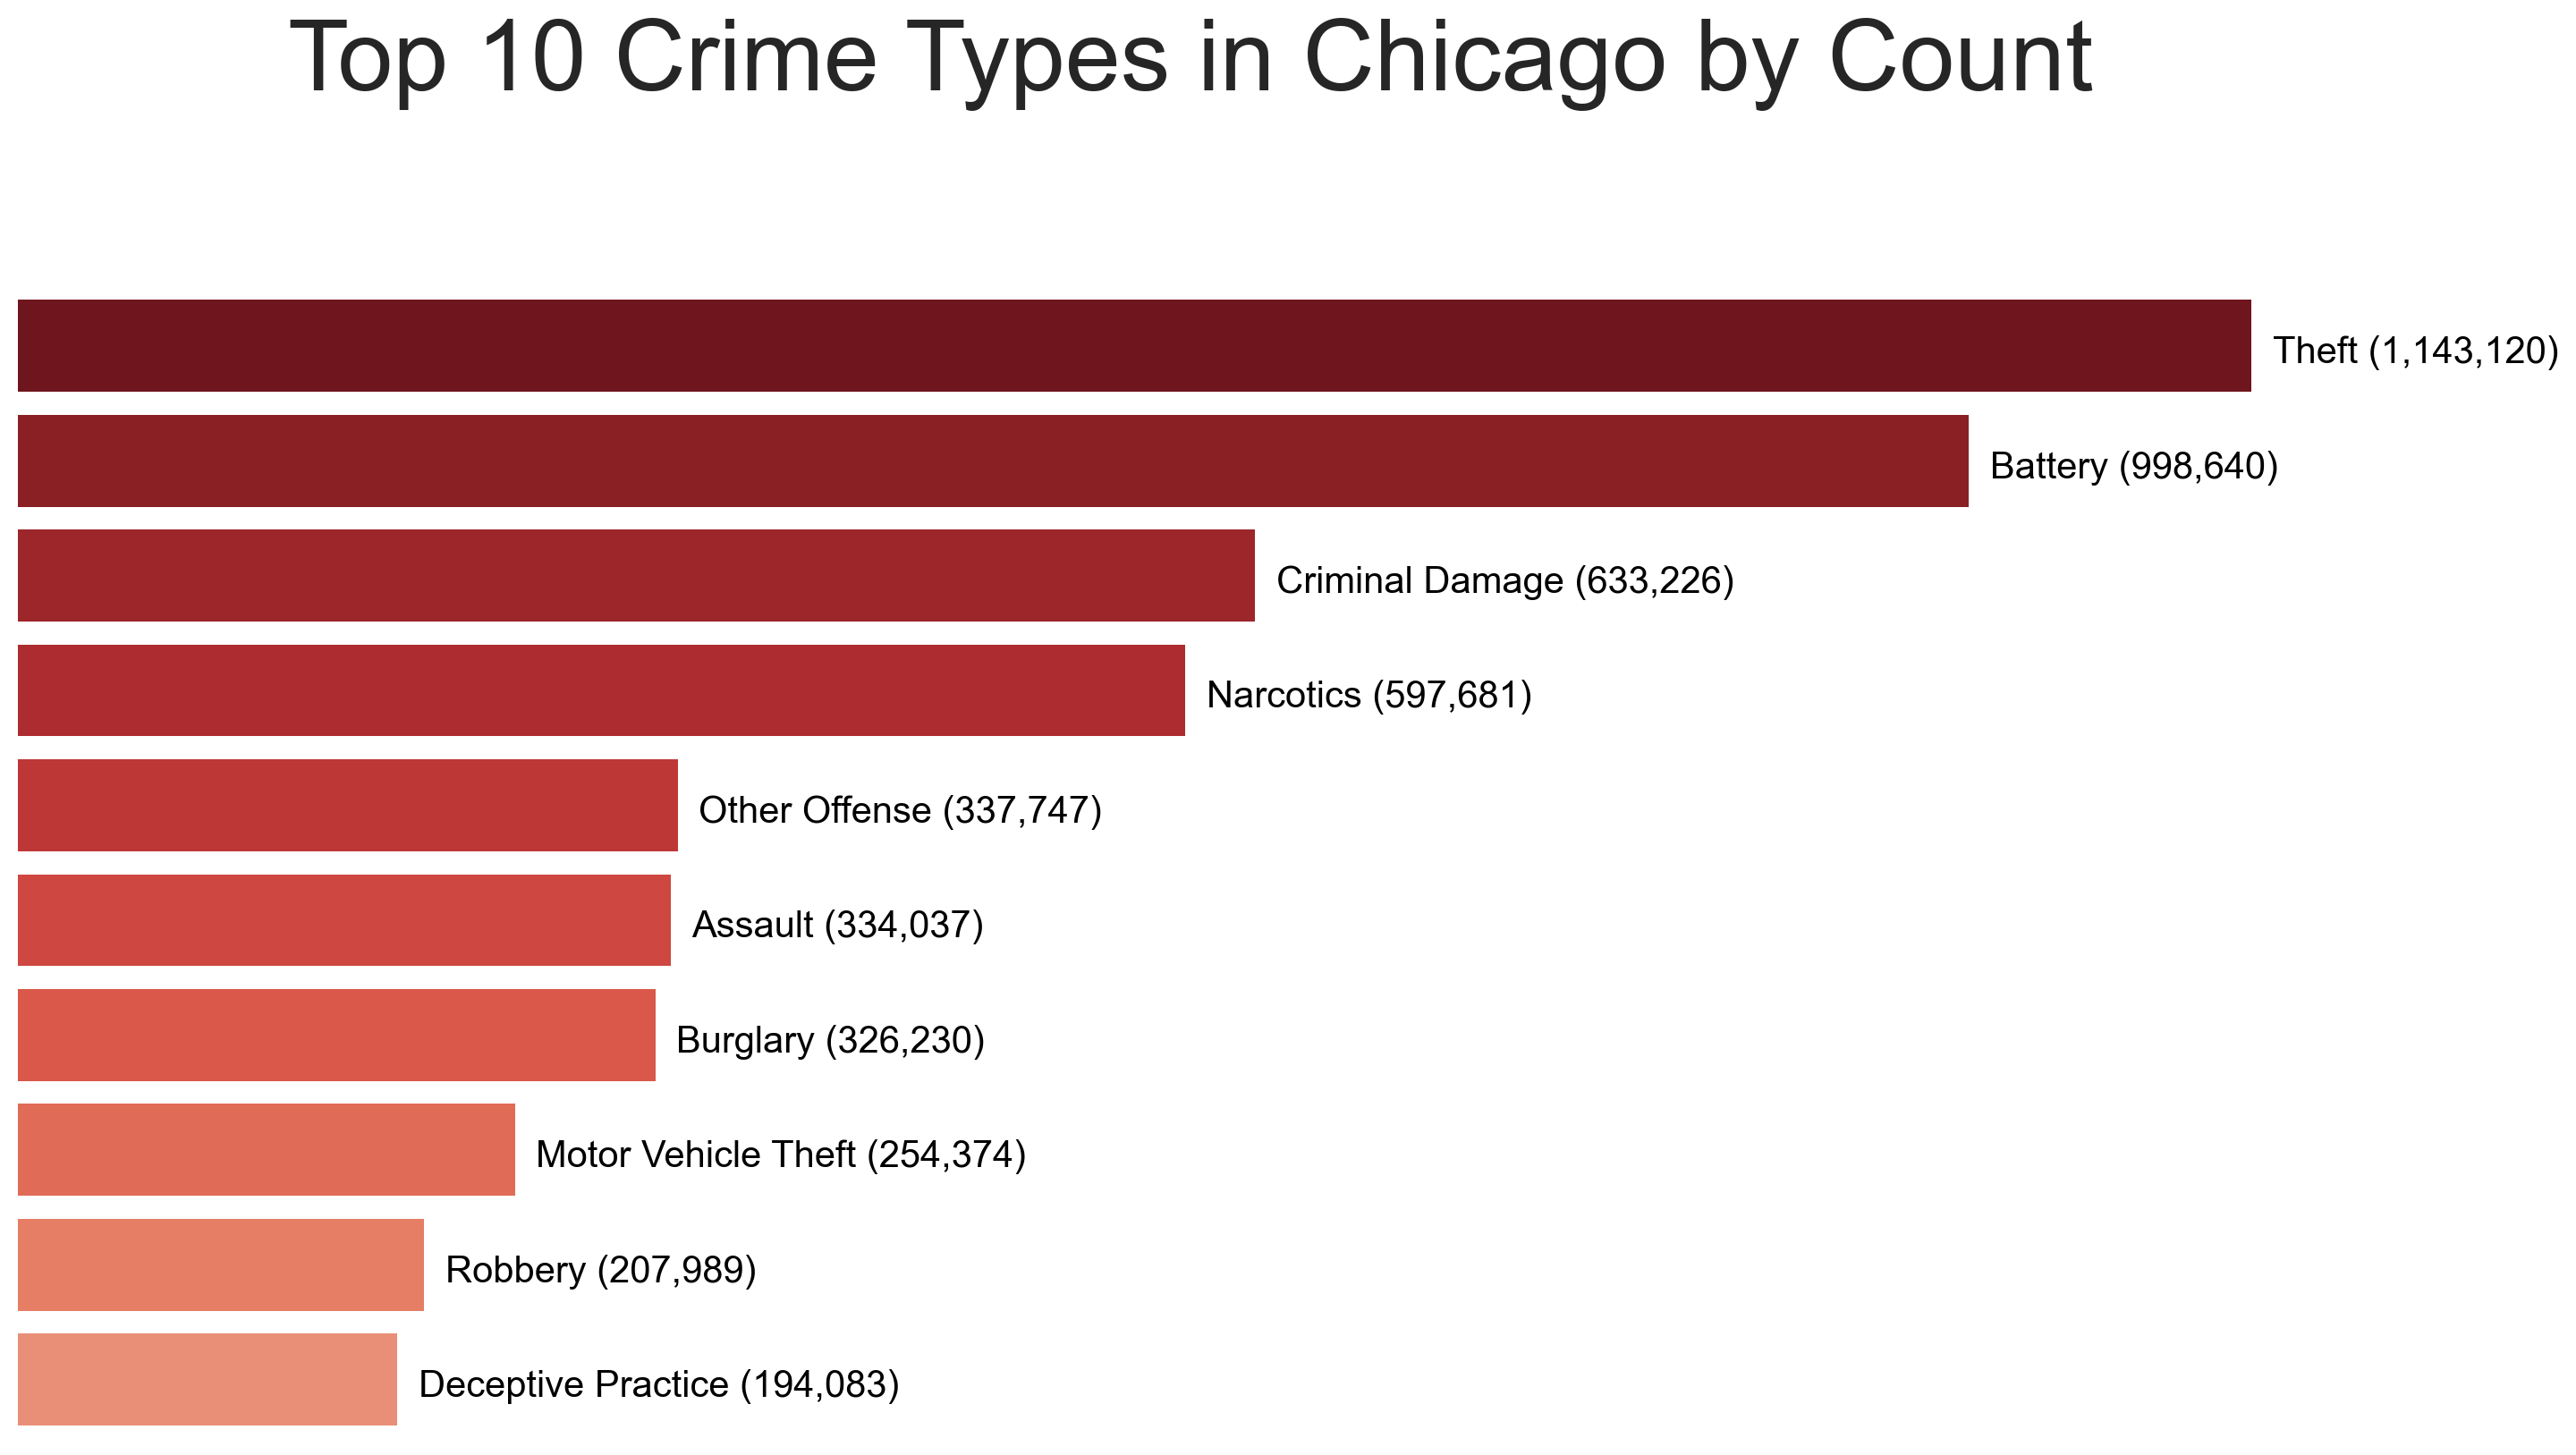

In [3]:
# Set defualt title_size and title y postion
title_size, title_y = 40, 1.16
top_10_types = crimes.primary_type.value_counts()[:10] # top 10 crime types

x = top_10_types.index # Get x labels and order

fig, ax = plt.subplots(figsize=figsize) # Create figure and axes with default figure size

# Get the most '10' dark 'red' degrees out of '101' degree and '6' degree between each one
dark_reds = get_dark_colors(101, 6, 'Reds', 10)
dark_reds.reverse() # reverse it

# Add bar plot
sb_barplot = sb.barplot(ax = ax, x = top_10_types, y = x, order = x,
                        palette = dark_reds, edgecolor=None, linewidth=0)

sb.despine(left=True, bottom=True) # Remove plot borders

# Add annotation for each patch
for crime, p in zip(x.values, sb_barplot.patches): 
    sb_barplot.annotate(text       = crime + ' (' + format(int(p.get_width()), ',d') + ')', 
                        xy         = (p.get_width() - 40000, p.get_y() + p.get_height() * 0.57), 
                        ha         = 'left',
                        va         = 'center', 
                        xytext     = (40, 0), 
                        textcoords = 'offset points',
                        color = 'black',
                        size = 15)

plt.xticks(fontsize=15, color = 'black') # Increase x ticks labels font size
plt.xticks([]), plt.yticks([]), plt.xlabel(''), plt.ylabel('') # Remove x and y ticks and labels

plt.title('Top 10 Crime Types in Chicago by Count', y = title_y, fontsize = title_size); # Add descriptive title

plt.tight_layout() # Improve appearance

plt.savefig('src/top_10_types.png', transparent=True, bbox_inches='tight', pad_inches=1); # Save as png file

<a id="id_3_7"></a>
## [**WordCloud by All the Crime Types**](#id_3_7)
Now let's see all the crimes in a WordCloud..

In [4]:
# Modify crime types to remove some unnecessary words
crimes.primary_type = crimes.primary_type.apply(lambda x: 'Damage' if x == 'Criminal Damage'
                                                                     else('Trespass' if x == 'Criminal Trespass' 
                                                                          else('Sexual Assault' if x == 'Crim Sexual Assault'
                                                                              else('Non-Criminal' if x == 'Non - Criminal'
                                                                                  else(x)))))
# Get type frequencies
crimes_counts = crimes.primary_type.value_counts()

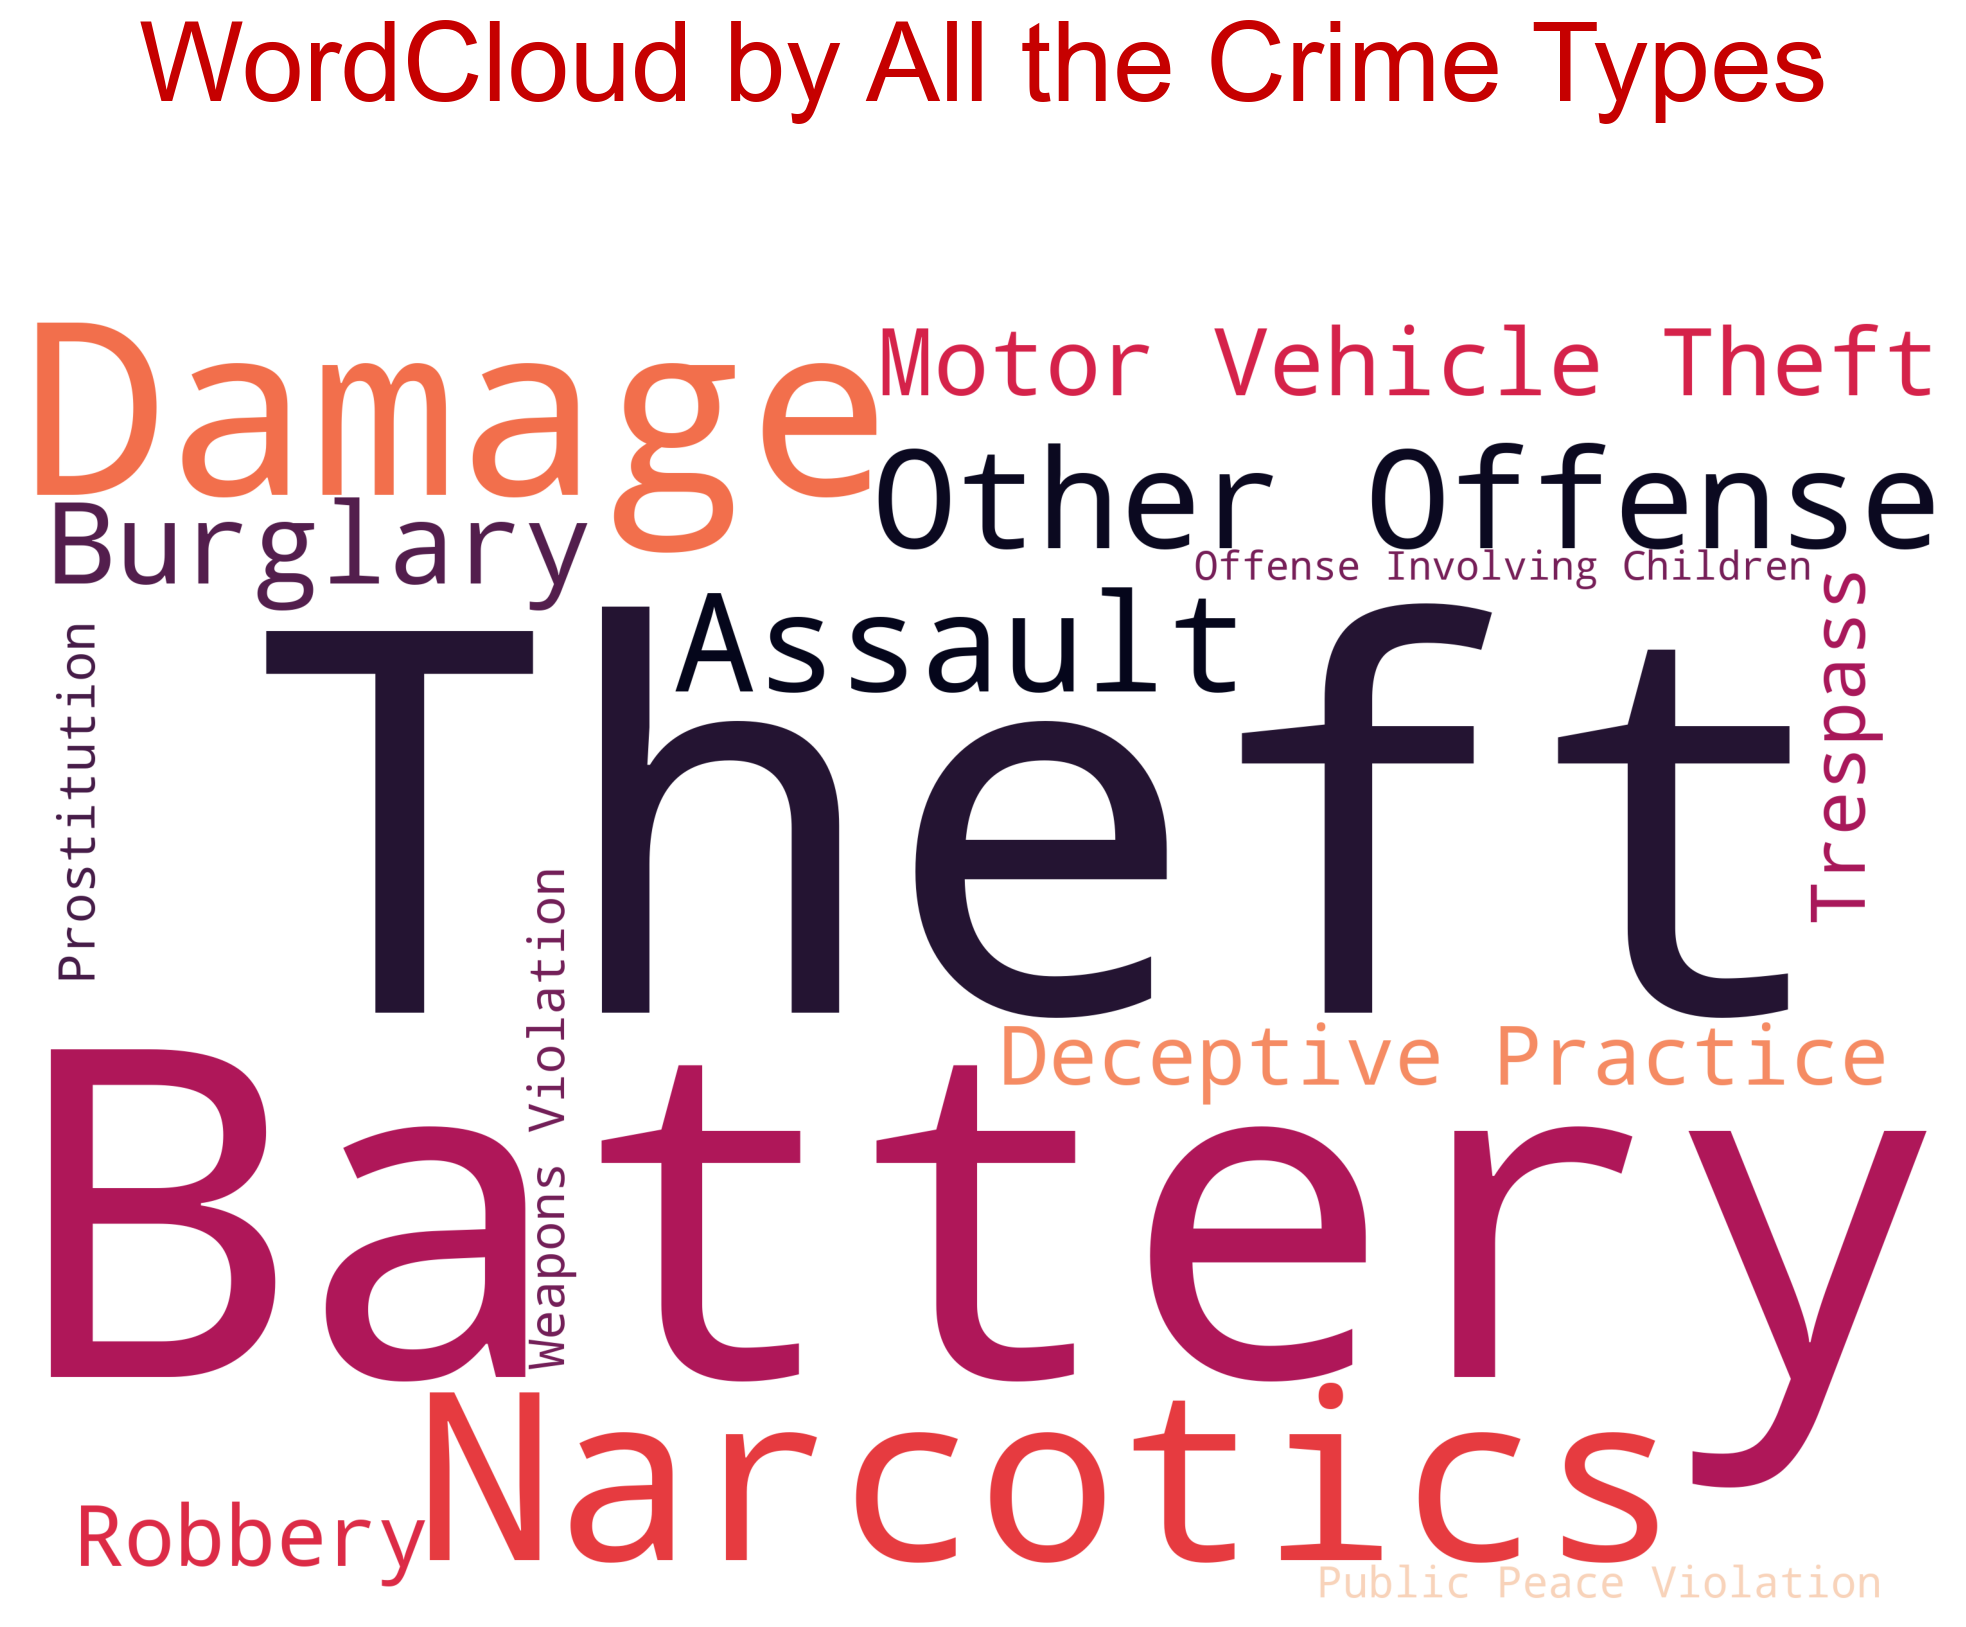

In [5]:
# Get the most '12' dark 'red' degrees out of '100' degree and '7' degree between each one
dard_reds = get_dark_colors(100, 7, 'Reds', 12)
dard_reds = LinearSegmentedColormap.from_list('mycmap', dard_reds) # Create custome colormap

# Create word cloud object
wordcloud2 = WordCloud(width = 3000,
                       height = 2000,
                       background_color ='white',
                       random_state=1,
                       collocations=False,
                       min_font_size=50,
                       colormap='rocket').generate_from_frequencies(crimes_counts)

plt.figure(figsize=figsize) # Set figsize
plt.imshow(wordcloud2) # Plot the word cloud
plt.axis("off") # Remove axis

plt.title('WordCloud by All the Crime Types', y = title_y, fontsize=title_size, color = '#c60000') # Set title
plt.tight_layout() # Improve appearance
  
plt.savefig('src/word_cloud.png', bbox_inches='tight', facecolor='white', pad_inches=1); # Save as png file

<a id="id_3_2"></a>
## [**What're the Top 4 Crimes for the Most Dangerous Locations in Chicago?**](#id_3_2)

**Theft crimes** are active in `streets` and `parking garages`, **Narcotic crimes** are active in `sidewalks` and `alleys`, while **Battery crimes** are active in `schools`, `public buildings`, `residences` and `apartments`.

In [6]:
# Get top 8 danger plcaes
top_8_danger_places = crimes.location_description.value_counts().drop('Other')[:8]
top_8_danger_places_df = crimes[crimes['location_description'].isin(top_8_danger_places.index.values)].reset_index(drop=True)

# Group by 'location_description' and 'primary_type'
group = top_8_danger_places_df.groupby(['location_description', 'primary_type']).count().dropna()

# Insert the Multi index level and rename 'id' column to 'count' and change 'count' to int data type
top_danger_plcaes = group['id'].reset_index().rename(columns={'id': 'count'})
top_danger_plcaes['count'] = top_danger_plcaes['count'].astype(int)

# Sort by 'location_description' and 'count'
top_danger_plcaes = top_danger_plcaes.sort_values(['location_description', 'count'], ascending=False).reset_index(drop=True)

# Rename some categorical values
top_danger_plcaes.location_description = top_danger_plcaes.location_description.apply(lambda 
                                             x: 'School, Public Building' if x == 'School, Public, Building'
                                                    else(x.replace('-', ' ') if x == 'Residence-Garage'
                                                        else('Parking Garage' if x == 'Parking Lot/Garage(Non.Resid.)'
                                                            else(x))))

# Add new categorical order
new_cate_order = ['Street', 'Sidewalk', 'Alley', 'School, Public Building', 
                  'Residence', 'Residence Garage', 'Parking Garage', 'Apartment']
top_danger_plcaes.location_description = pd.Categorical(top_danger_plcaes.location_description,
                                                        ordered=True,
                                                        categories=new_cate_order)
# Top danger plcaes
danger_plcaes = top_danger_plcaes.location_description.unique()
df_ls = []

# Get only the top 4 crime type for each plcae
for place in danger_plcaes:
    place_df = top_danger_plcaes[top_danger_plcaes['location_description'] == place][:4]
    place_df = place_df.sort_values(['location_description', 'count'])
    df_ls.append(place_df)

# Add dfs toogather and resort
top_danger_plcaes = pd.concat(df_ls, ignore_index = True, axis = 0)
top_danger_plcaes = top_danger_plcaes.sort_values(by=['location_description', 'count']).reset_index(drop=True)

In [7]:
# Get frequencies for each type and drop value equal to 0
top_primary_types = top_danger_plcaes.primary_type.value_counts()
top_primary_types = top_primary_types[top_primary_types != 0].index.values

# Create function to set customized Color for each crime type
def get_my_colors(palette, n_color, types):
    sb_colors = sb.color_palette(palette, n_color)
    if len(sb.color_palette(palette)) != 10:
        sb_colors = sb.color_palette(palette) + ['#b98397', '#8ecbf3']
        
    crime_types_colors = {}
    for n, crime in enumerate(types):
        crime_types_colors[crime] = sb_colors[n]
    return crime_types_colors

# Create function to add custome legend
def add_custome_legend(color_dic, fontsize, x ,y, fig, handle):
    handle_ls = []
    if handle == 'patch':
        for k,v in color_dic.items():
            handle_ls.append(mpatches.Patch(color=v, label=k))
    else:
        for k,v in color_dic.items():
            handle_ls.append(Line2D([0], [0], color=v, label=k, lw=4))
    
    fig.legend(handles = handle_ls,
               fontsize = fontsize,
               frameon = False,
               bbox_to_anchor = [x ,y])

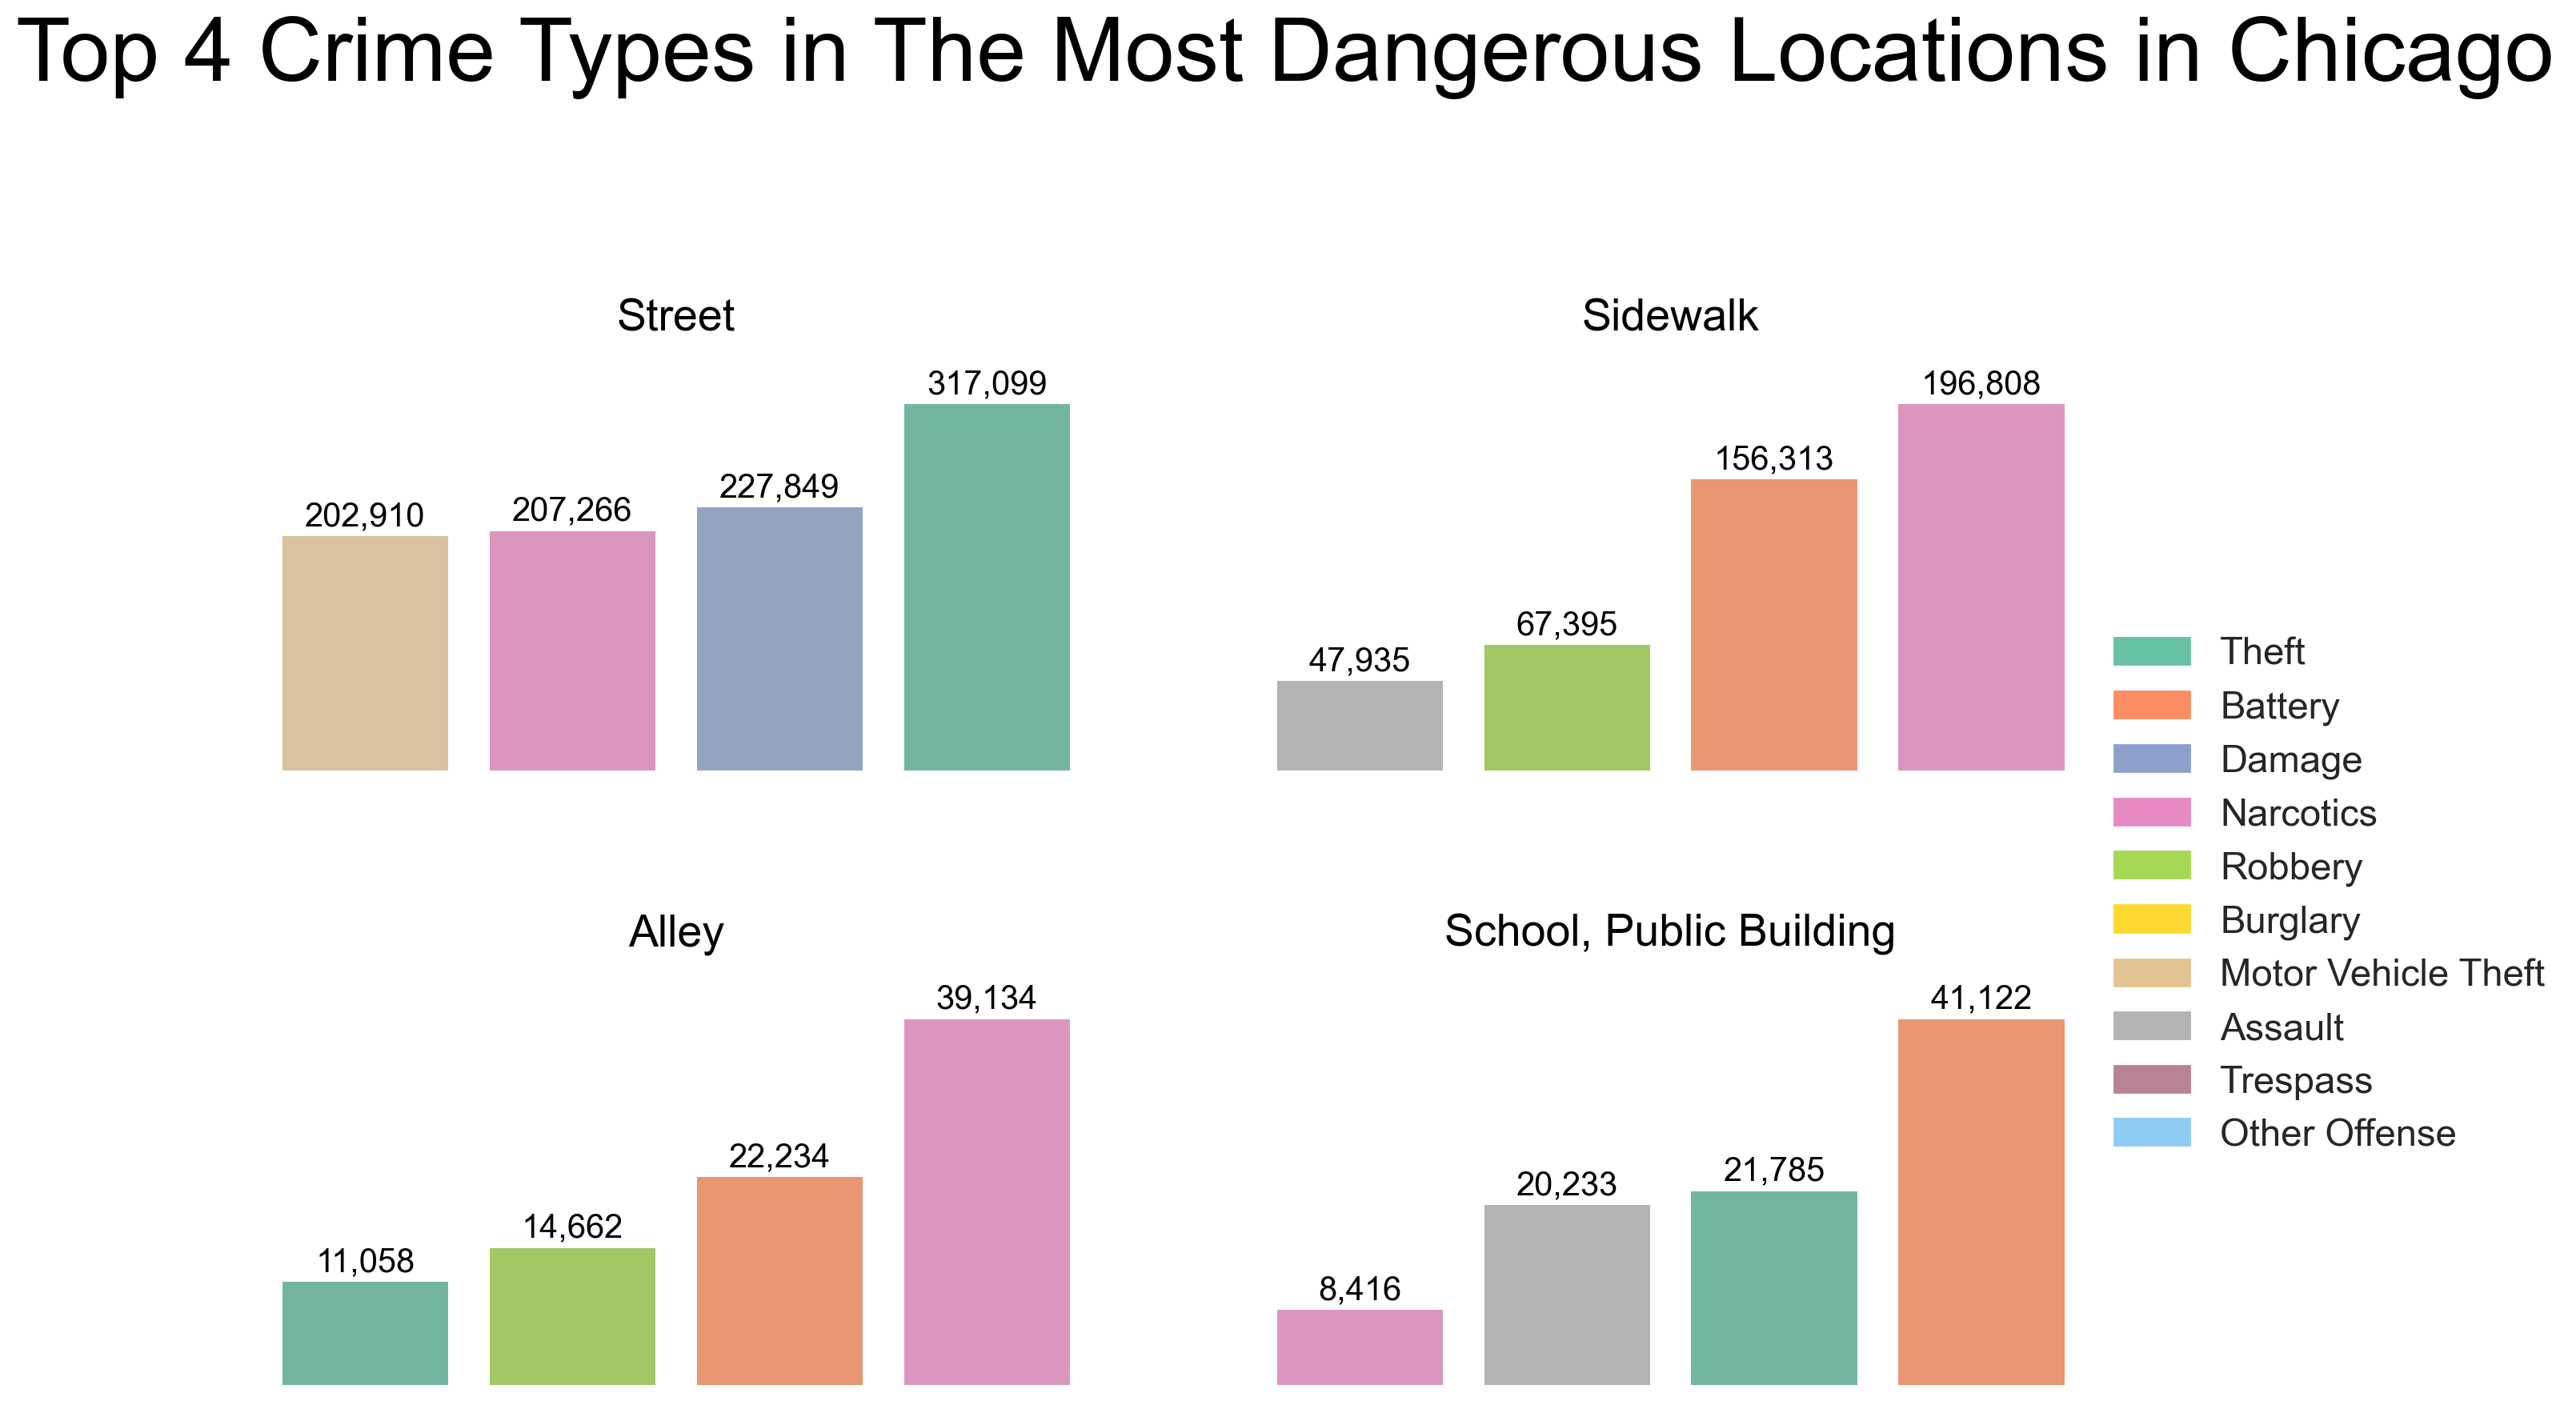

In [8]:
# Create function to plot only 4 places at a time
def set_4_plots(start_edge, end_edge, save_num):
    fig, axes_sub = plt.subplots(2, 2, figsize=figsize) # Create figure and axes with default figure size
    
    fig.subplots_adjust(hspace=0.6) # increase horizontal space

    # Flatten axes array
    axes = axes_sub.flatten()
    
    # Add title
    fig.suptitle('Top 4 Crime Types in The Most Dangerous Locations in Chicago', 
                 fontsize=title_size, y = title_y, x = 0.56 ,color = 'black')
    
    # Set a color from palette 'Set2' for each crime type 
    color_dic = get_my_colors('Set2', 10, top_primary_types) 
    
    # Start to plot the 4 places at once
    for ax_n, place in enumerate(danger_plcaes.sort_values()[start_edge : end_edge]):
        ax = axes[ax_n] # Set current axis
        
        # Subsetting the data to the current crime
        place_df = top_danger_plcaes[top_danger_plcaes['location_description'] == place] 
        types = place_df.primary_type.values
        color_palette = {}
        for t in types:
            color_palette[t] = color_dic[t]
        
        # Add barplot
        barplot = sb.barplot(ax = ax, x = list(place_df.primary_type), y = place_df['count'], 
                             palette = color_palette, edgecolor=None, linewidth=0)
        
        # Add title for the current plot
        ax.set_title(place, fontsize = 20, color = 'black', y = 1.11)
        
        # Remove labels and ticks from axes
        ax.set_xlabel(''), ax.set_ylabel(''), ax.set_yticklabels(''), ax.set_xticklabels('')
        
        ax.set_facecolor('xkcd:white') # Setting face color to white
        
        sb.despine(left=True, bottom=True) # Remove plot borders
        
        for p in barplot.patches: # Add annotation for each patch
            barplot.annotate(text       = format(int(p.get_height()), ',d'),
                             xy         = (p.get_x() + p.get_width() / 2., p.get_height()),
                             ha         = 'center', va = 'center',
                             xytext     = (0, 9),
                             textcoords = 'offset points',
                             color='black',
                             size = 15)
    
    # Add custome legend
    add_custome_legend(color_dic=color_dic, fontsize=17, x=1.11, y=0.716, fig=fig, handle='patch')
    #plt.tight_layout() # Improve appearance

    plt.savefig(f'src/top_danger_plcaes{save_num}.png', transparent=True, bbox_inches='tight', pad_inches=1); # Save as png file
    
set_4_plots(0, 4, 1)

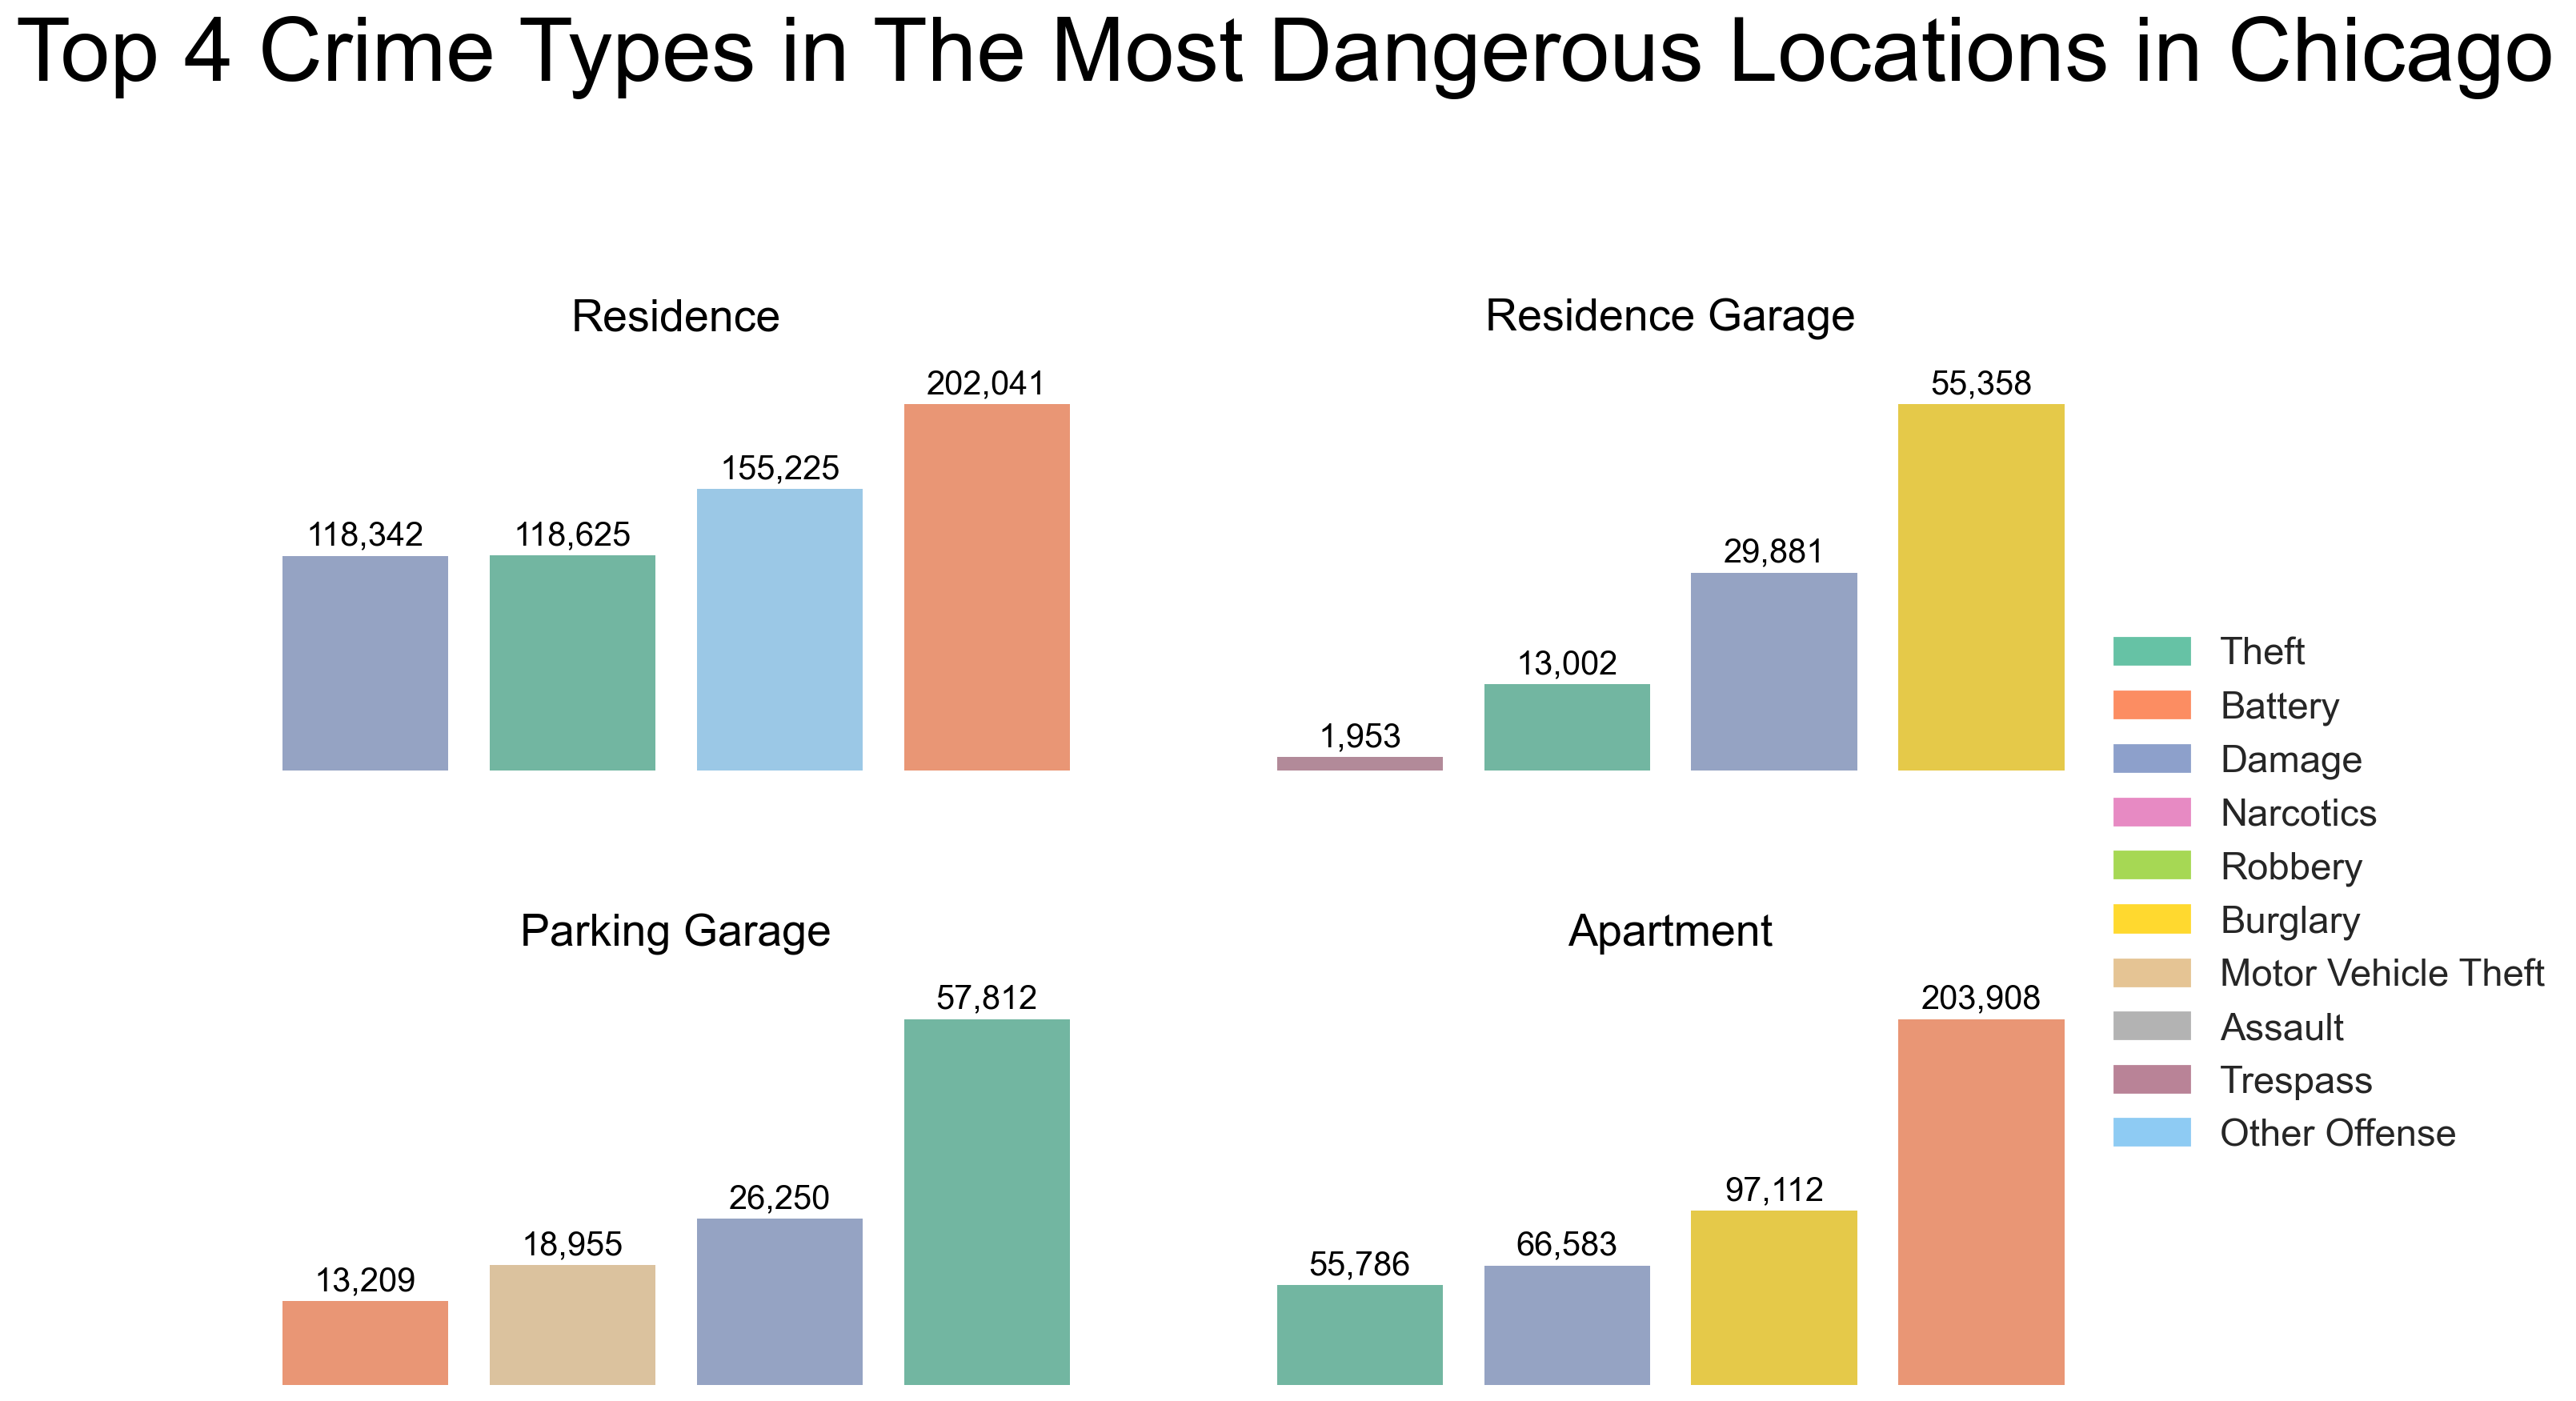

In [9]:
set_4_plots(4, 9, 2)

<a id="id_3_3"></a>
## [**What're the Top Crimes Related to Domestic Violence?**](#id_3_3)

`Battery crimes` are the most common crimes related to **Domestic Violence**.

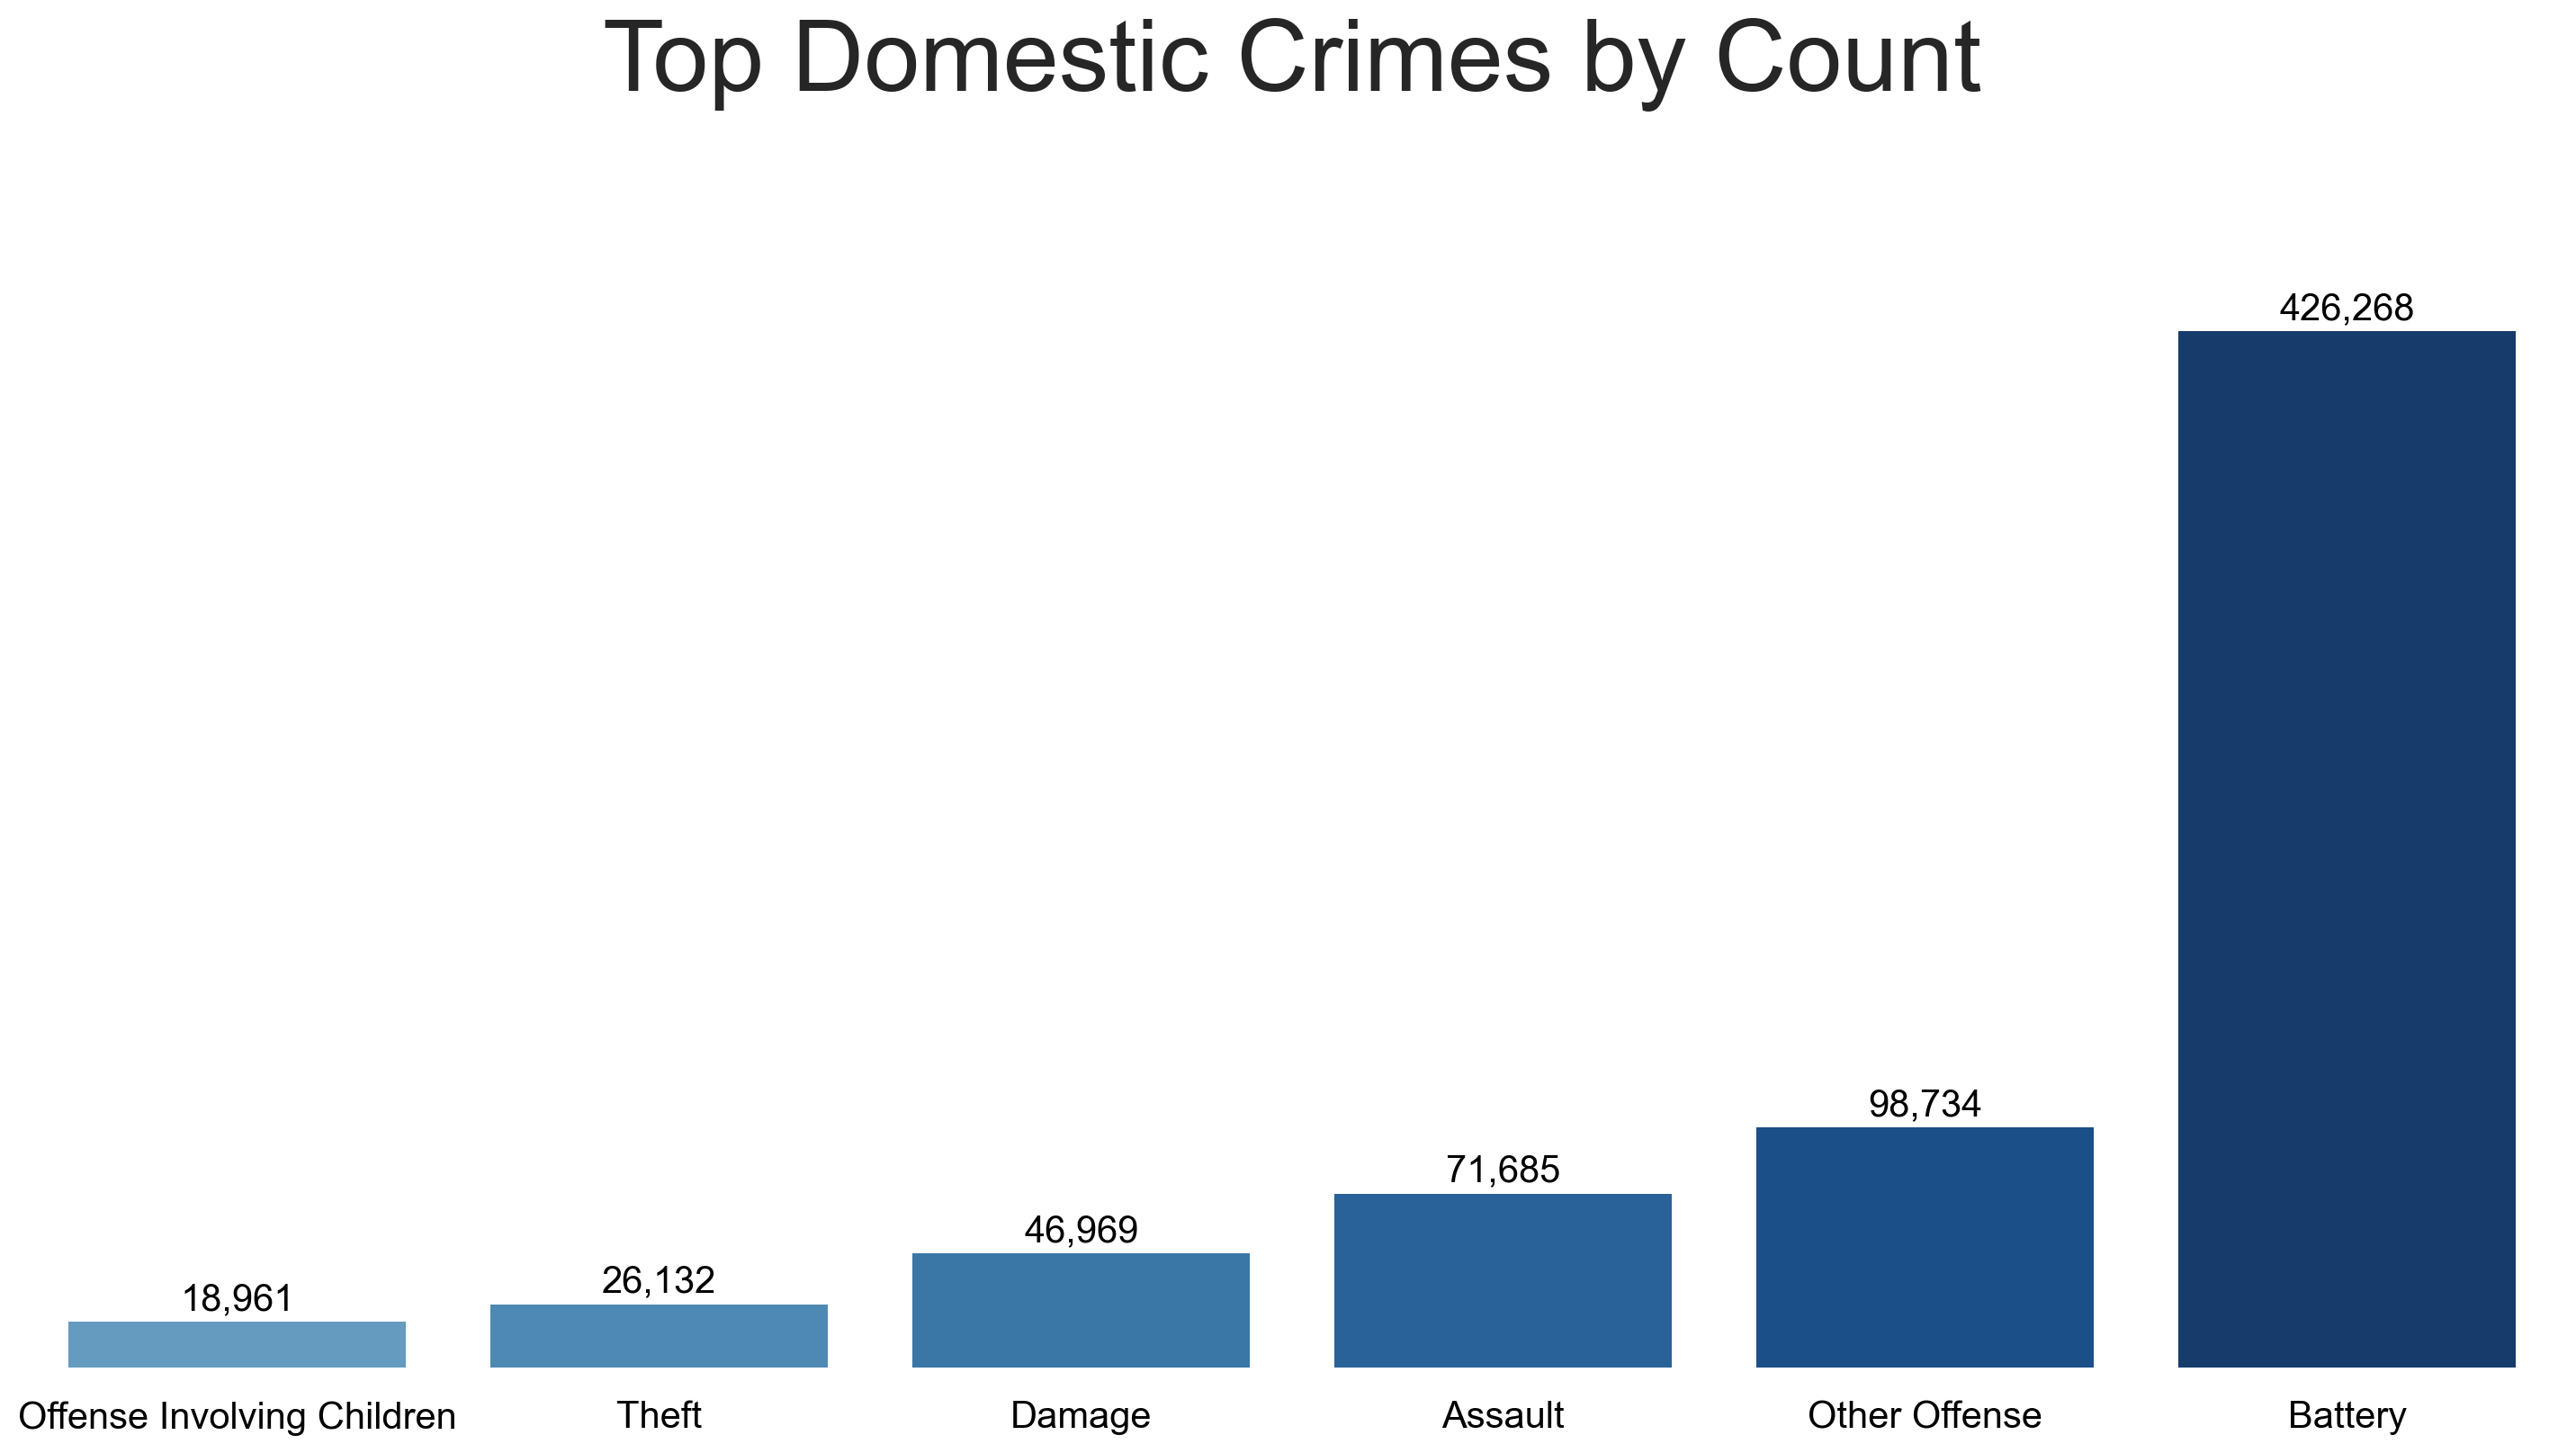

In [10]:
# Getting the top 6 crime types related to Domestic violence
top_domestic_crimes = crimes[crimes['domestic']].reset_index(drop=True).primary_type.value_counts()[:6].sort_values()
x = list(top_domestic_crimes.index.values) # Get x labels

fig, ax = plt.subplots(figsize=figsize) # Create figure and axes with default figure size

# Get the most '6' dark 'blue' degrees out of '50' degree and '4' degree between each one
dark_blues = get_dark_colors(50, 4, 'Blues', 6)

# Create bar plot
sb_barplot = sb.barplot(ax = ax, x = x, y = top_domestic_crimes, order = x, 
                        palette = dark_blues, edgecolor=None, linewidth=0) 
sb.despine(left=True, bottom=True) # Remove plot borders

for p in sb_barplot.patches: # Add annotation for each patch
    sb_barplot.annotate(text       = format(int(p.get_height()), ',d'),
                        xy         = (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha         = 'center', va = 'center',
                        xytext     = (0, 9),
                        textcoords = 'offset points',
                        color='black',
                        size = 15)

plt.xticks(fontsize=15, color = 'black'), plt.yticks([]), plt.xlabel(''), plt.ylabel('') # Reomve ticks and labels

plt.title('Top Domestic Crimes by Count', y = title_y, fontsize = title_size); # Add descriptive title

plt.tight_layout() # Improve appearance

plt.savefig('src/top_domestic_crimes.png', transparent=True, bbox_inches='tight', pad_inches=1); # Save as png file

<a id="id_3_4"></a>
## [**What's the Relationship between Police Performance and Total Crimes Over Years?**](#id_3_4)

We found a `decrease` in **police performance** from `2014` to `2016` despite a `decrease` in the **total number of crimes** in those years.

In [11]:
# Get the year for each record
arrest_year = crimes[['id', 'arrest']].merge(dates[['id', 'year']], on='id')

# Drop years 2001 and 2017 due to the short in records
arrest_year.drop(arrest_year[arrest_year['year'] == 2001].index, inplace=True)
arrest_year.drop(arrest_year[arrest_year['year'] == 2017].index, inplace=True)
arrest_year.reset_index(drop=True, inplace=True)

# Group by year
group_year = arrest_year.groupby('year')['arrest']

# divide the successful arrests by the total arrests to get success ratio
success_ratio = ((group_year.sum() / group_year.count()) * 100)
tot_crimes_year = arrest_year.groupby('year')['id'].count()

# Set y ticks for each axis 1 or 2 ('K' instead of thousand or '%' perecentage sign)
def set_y_ticks(ax, up_edge, step, str_suff, color):
    y_ticks = ax.get_yticks()
    y_ticks_new = np.arange(0, y_ticks.max()+up_edge, step)
    if str_suff == 'k':
        y_ticks_labels = [str(int(x))[:-3]+str_suff if x != 0 else str(int(x)) for x in y_ticks_new]
    else:
        y_ticks_labels = [str(int(x))+str_suff for x in y_ticks_new]
    ax.set_yticks(y_ticks_new), ax.set_yticklabels(y_ticks_labels, fontsize=15, color = color)

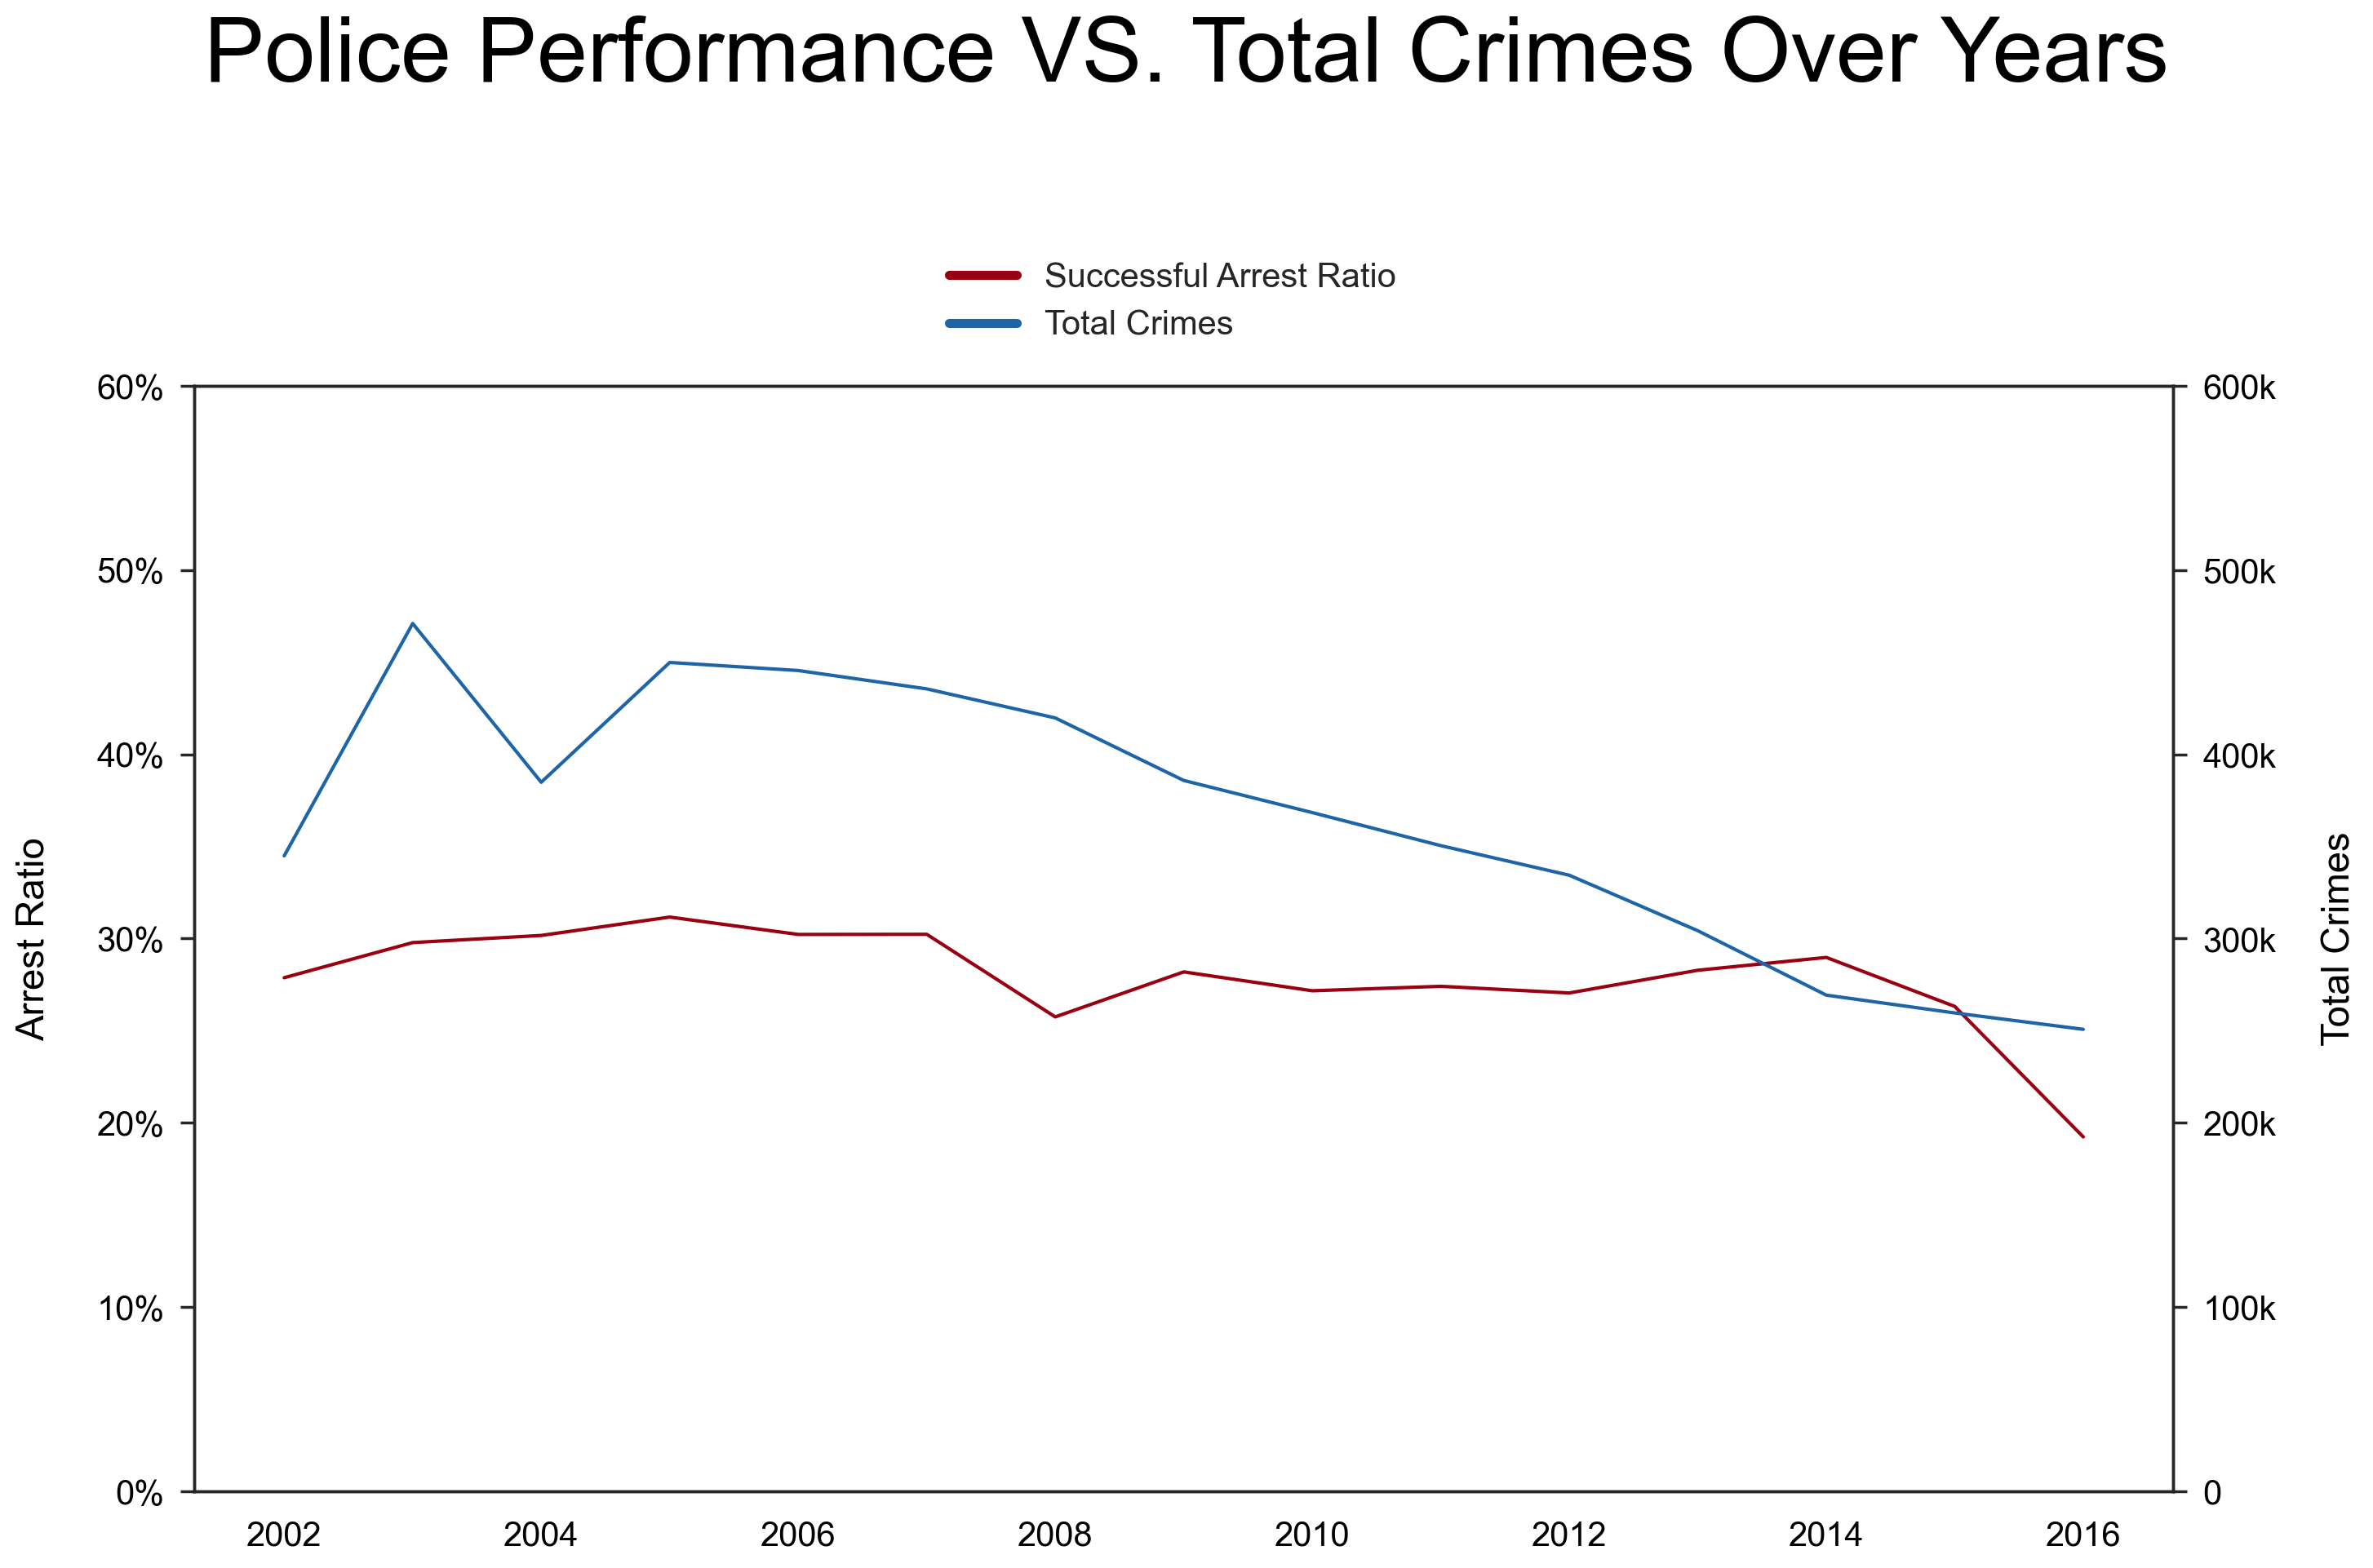

In [12]:
fig, ax = plt.subplots(1, 1, figsize=figsize) # Create figure and axes with default figure size
ax_color, ax2_color = '#990011FF', '#1D65A6' # Axes colors

# Add title
fig.suptitle('Police Performance VS. Total Crimes Over Years', fontsize = title_size, y = title_y, color = 'black')

sb.lineplot(ax = ax, x = list(success_ratio.index), y = success_ratio, ci=0, color=ax_color) # Create line plot

# Customize x ticks
x_ticks = ax.get_xticks()
x_ticks[0] = 2000.5
x_ticks_labels = [str(int(x)) for x in x_ticks]
x_ticks_labels[0], x_ticks_labels[-1] = '', ''
ax.set_xticks(x_ticks), ax.set_xticklabels(x_ticks_labels, fontsize=15, color = 'black')

# Creat axis 1 with perecentage sign as y tick labels
set_y_ticks(ax=ax, up_edge=30, step=10, str_suff='%', color='black')

ax2 = ax.twinx() # Get the twin axis
sb.lineplot(ax = ax2, x = list(tot_crimes_year.index), y = tot_crimes_year, ci=0, color=ax2_color) 
# Creat axis 2 with "K" as sign instead of 1,000 as y tick labels
set_y_ticks(ax=ax2, up_edge=200000, step=100000, str_suff='k', color='black')

# Set tick labels
ax.set_xlabel('')
ax.set_ylabel('Arrest Ratio', fontsize=17, color='black', labelpad=20)
ax2.set_ylabel('Total Crimes', fontsize=17, color='black', labelpad=20)

ax.set_facecolor('xkcd:white') # Setting face color to white

# Add custome legend with custome color
legend_colors = {'Successful Arrest Ratio': ax_color,
                 'Total Crimes': ax2_color}
add_custome_legend(color_dic=legend_colors, fontsize=15, x=0.6 ,y=1, fig=fig, handle='line')

plt.tight_layout() # Improve appearance
plt.savefig('src/success_aresst_ratio.png', transparent=True, bbox_inches='tight', pad_inches=1); # Save as png file

<a id="id_3_5"></a>
## [**What's the Distribution of the Money-Driven Crimes by Month and Weekday?**](#id_3_5)

`July` and `August` (summer months) are the **most** common months for crime while `February` and `March` are the **least**. On the other hand, `Saturday` and `Sunday` (weekends) are the **least** common days for crimes.

In [13]:
# Crimes that are money related
money_crimes_names = ['Theft', 'Burglary', 'Motor Vehicle Theft', 'Robbery']
money_crimes = crimes[['id', 'primary_type']].merge(dates[['id', 'month', 'weekday']]) # Merge with dates
# Filter the data frame and get only those crimes
money_crimes = money_crimes[money_crimes['primary_type'].isin(money_crimes_names)].reset_index(drop=True)

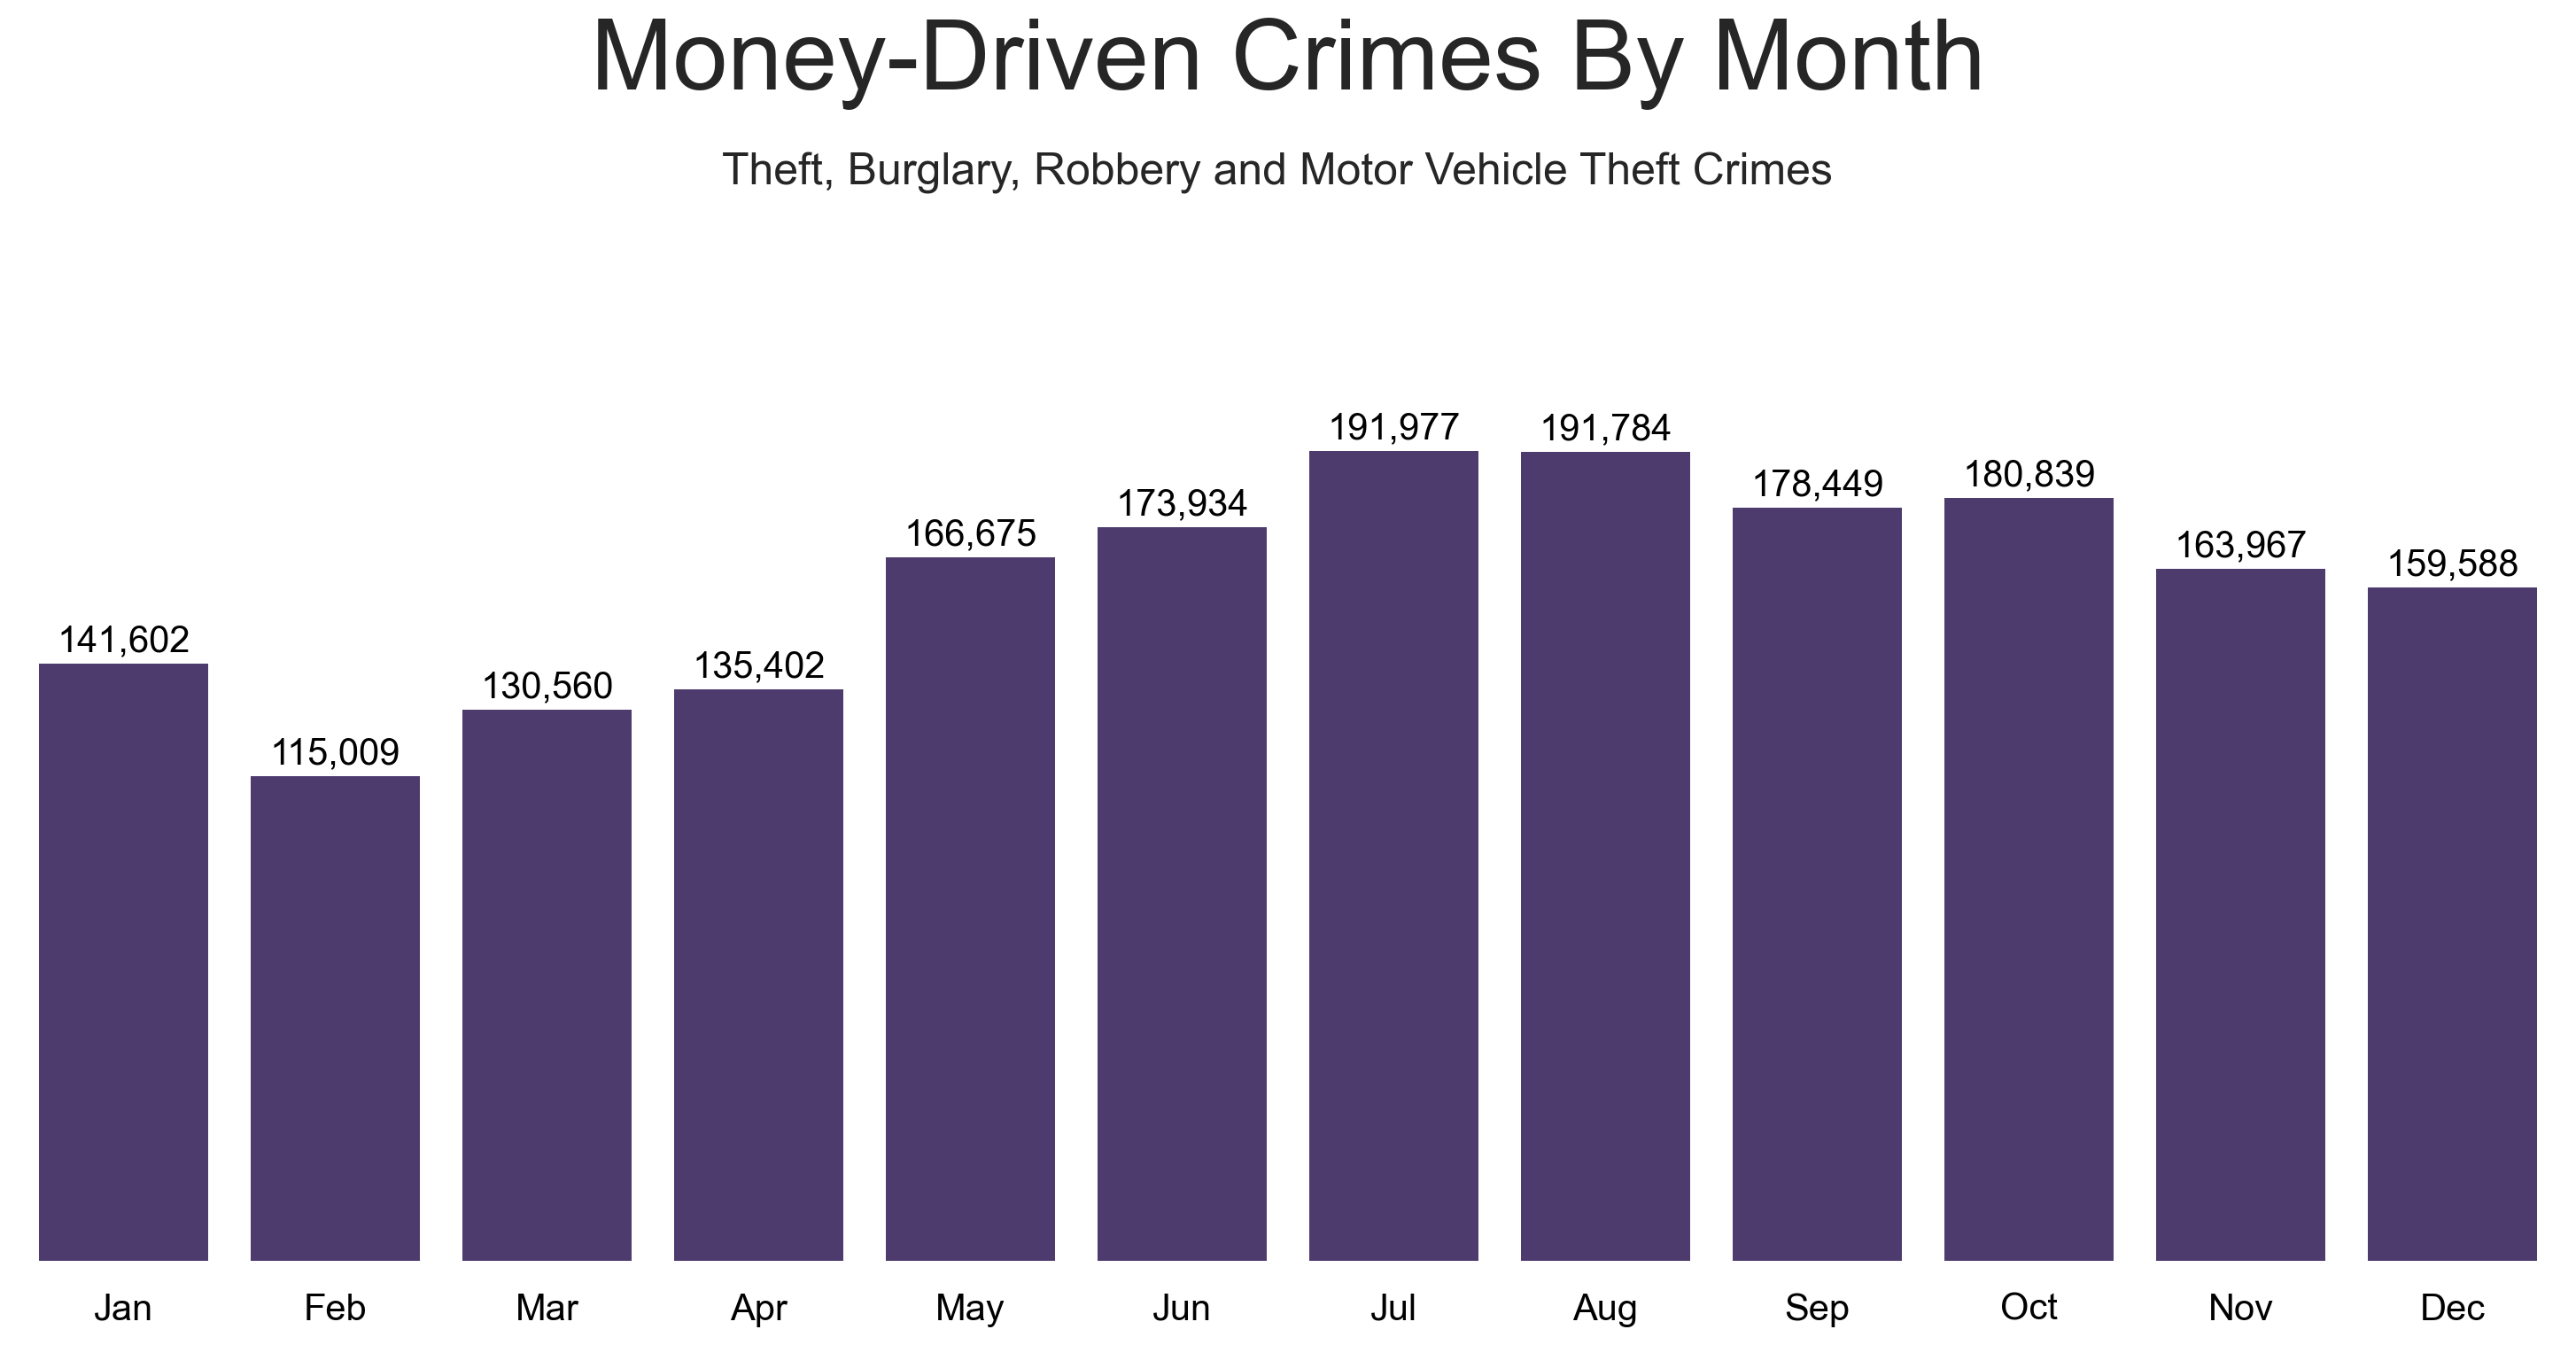

In [14]:
# Create function to display a bar plot depending on the the x parameter as Pandas Series
def set_bar_plot(data, x, color):
    fig, ax = plt.subplots(figsize=figsize) # Create figure and axes with default figure size

    sb_barplot = sb.countplot(x=x, data=data, color=color, edgecolor=None, linewidth=0) # Create bar plot
    sb.despine(left=True, bottom=True) # Remove plot borders
    
    for p in sb_barplot.patches: # Add annotation for each patch
        sb_barplot.annotate(text       = format(int(p.get_height()), ',d'),
                            xy         = (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha         = 'center', va = 'center',
                            xytext     = (0, 9),
                            textcoords = 'offset points',
                            color='black',
                            size = 15)
    
    plt.xticks(fontsize=15, color = 'black') # Increase x ticks labels font size
    plt.yticks([]), plt.xlabel(''), plt.ylabel('') # Remove ticks and label
        
    plt.title(f'Money-Driven Crimes By {x.title()}', y = title_y+.2, fontsize = title_size); # Add descriptive title
    
    plt.tight_layout() # Improve appearance
    
    # Add legend
    legend = plt.legend(labels=['Theft, Burglary, Robbery and Motor Vehicle Theft Crimes'], 
                        bbox_to_anchor=(0.73, 1.35), fontsize = 18, handlelength=0, handletextpad=0)
    
    plt.savefig(f'src/money_crimes_{x}.png', transparent=True, bbox_inches='tight', pad_inches=1); # Save as png file
    
set_bar_plot(data=money_crimes, x='month', color='#4c3277') # Call the function for the Month column

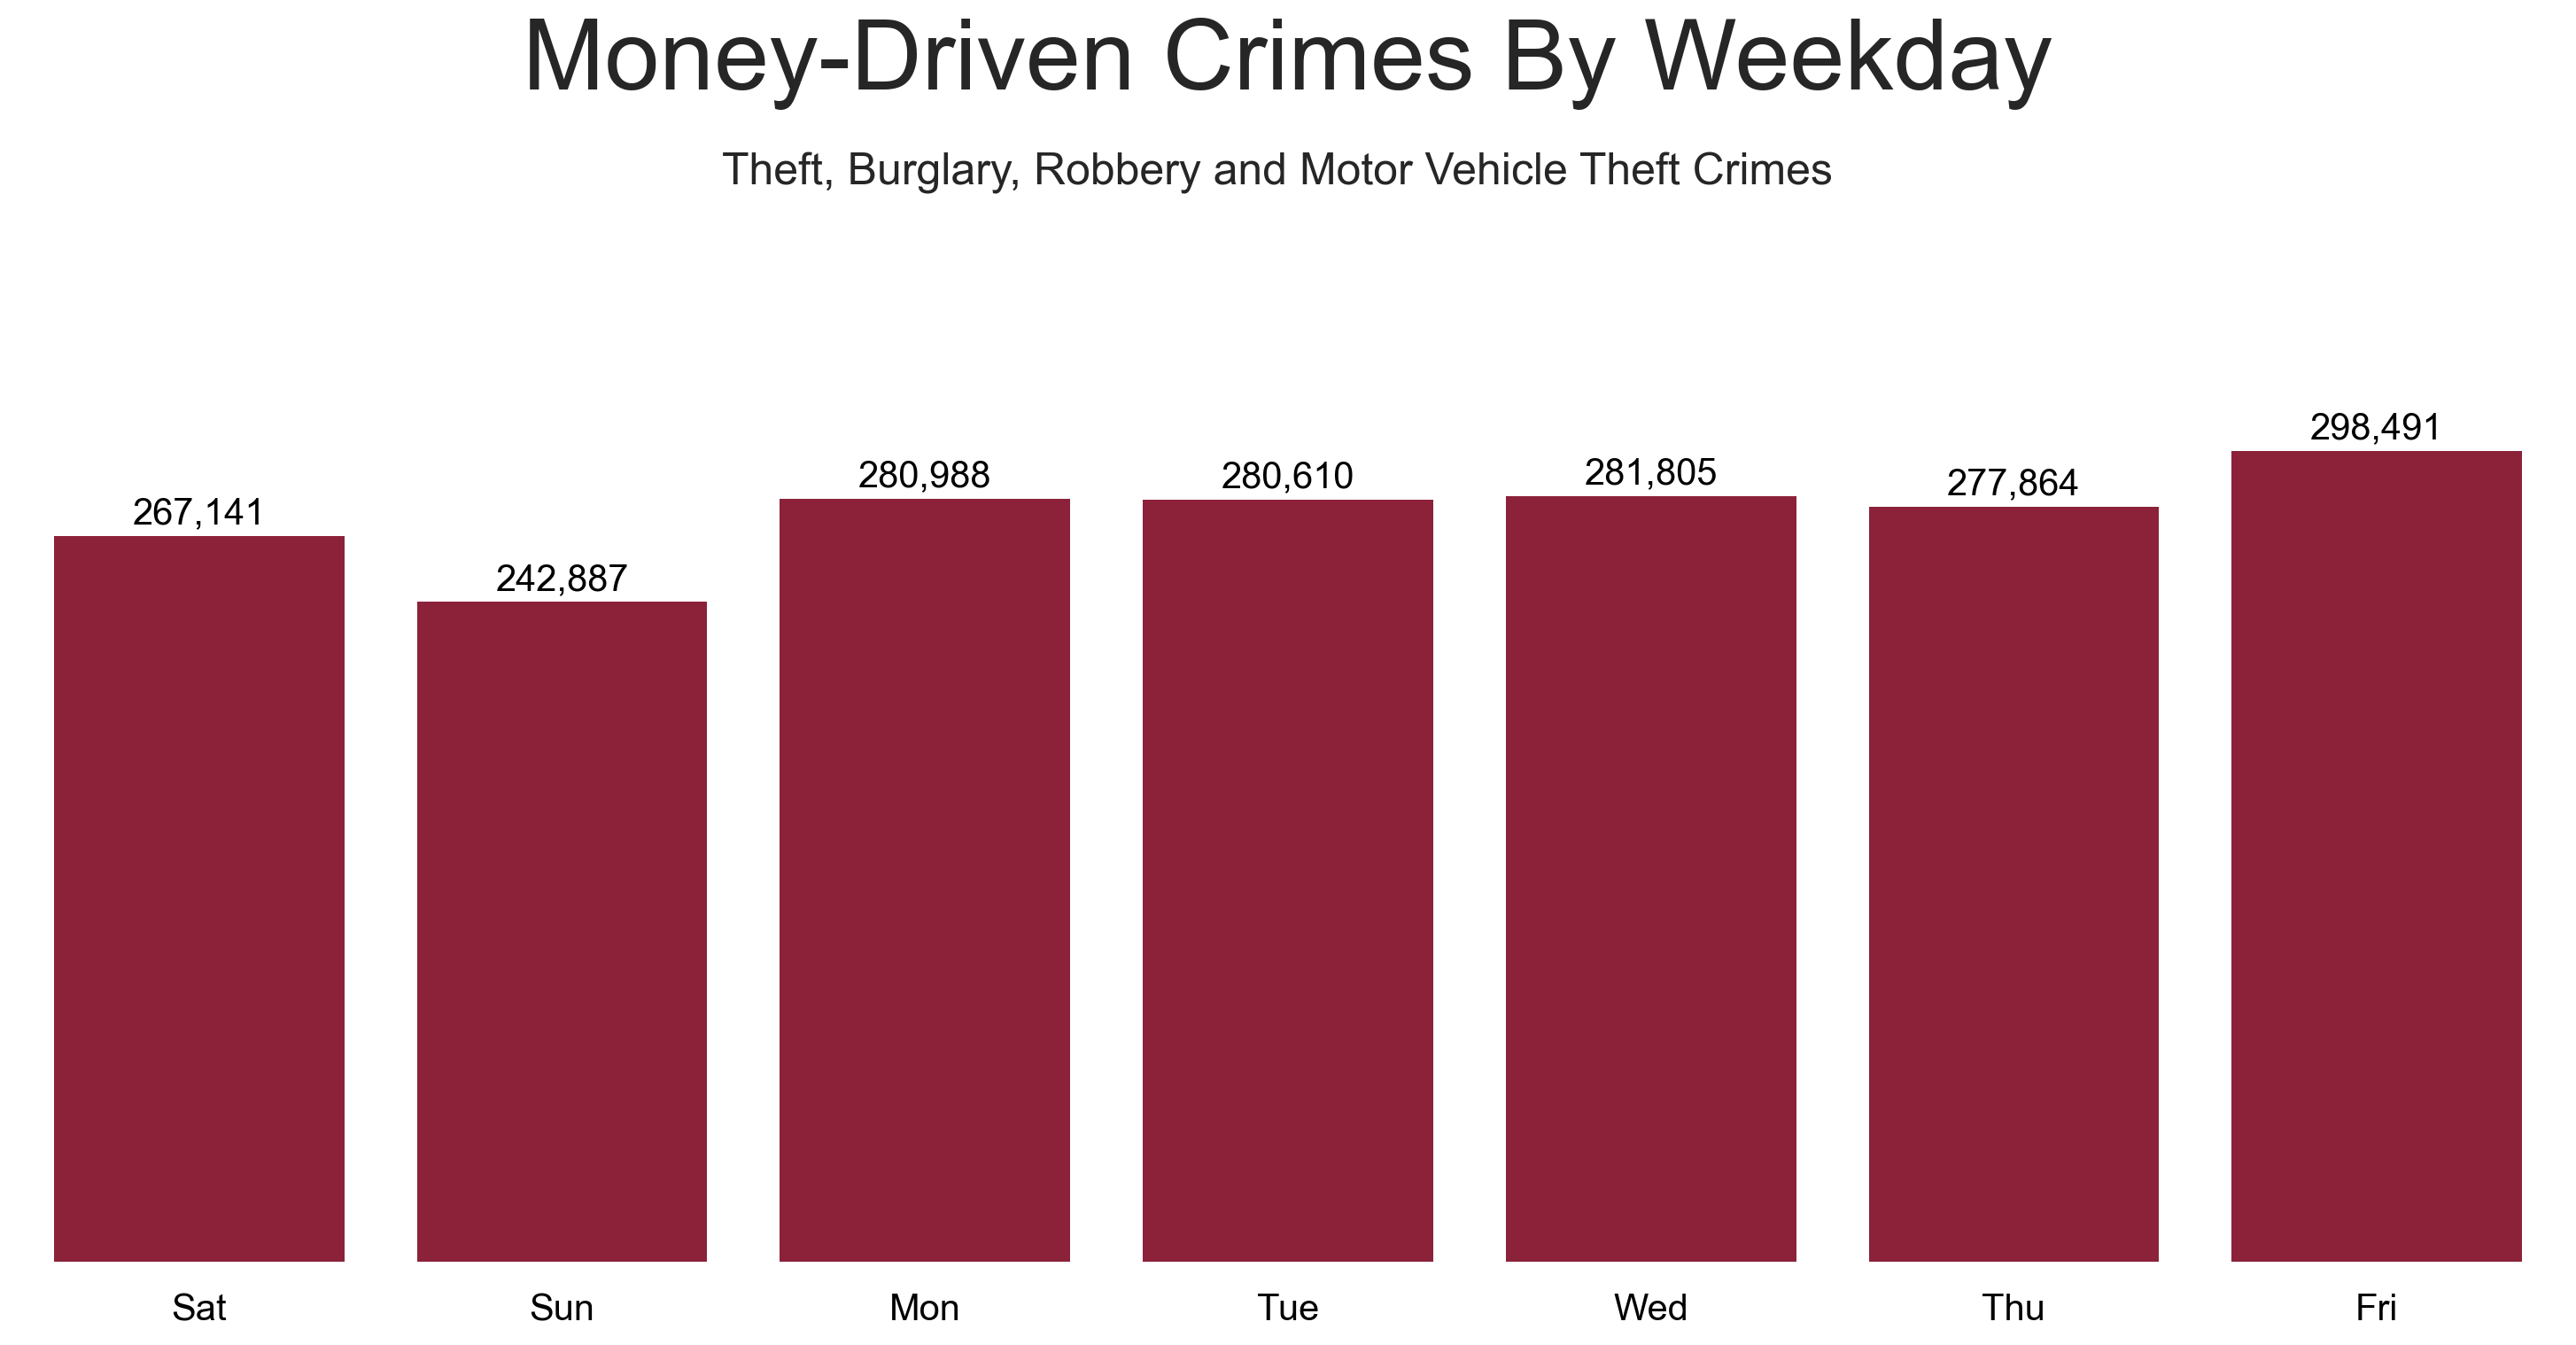

In [15]:
set_bar_plot(data=money_crimes, x='weekday', color='#9e1030ff')

<a id="id_3_6"></a>
## [**Where're the Most Dangerous Locations in Chicago?**](#id_3_6)

Crimes are **centred** in Chicago in the `east` while it's **moderate** in the `south` and **less** in the `north`. There are at least `1,000` crime for each location with only 1 or 2 locations that exceeding `10,000` crimes.

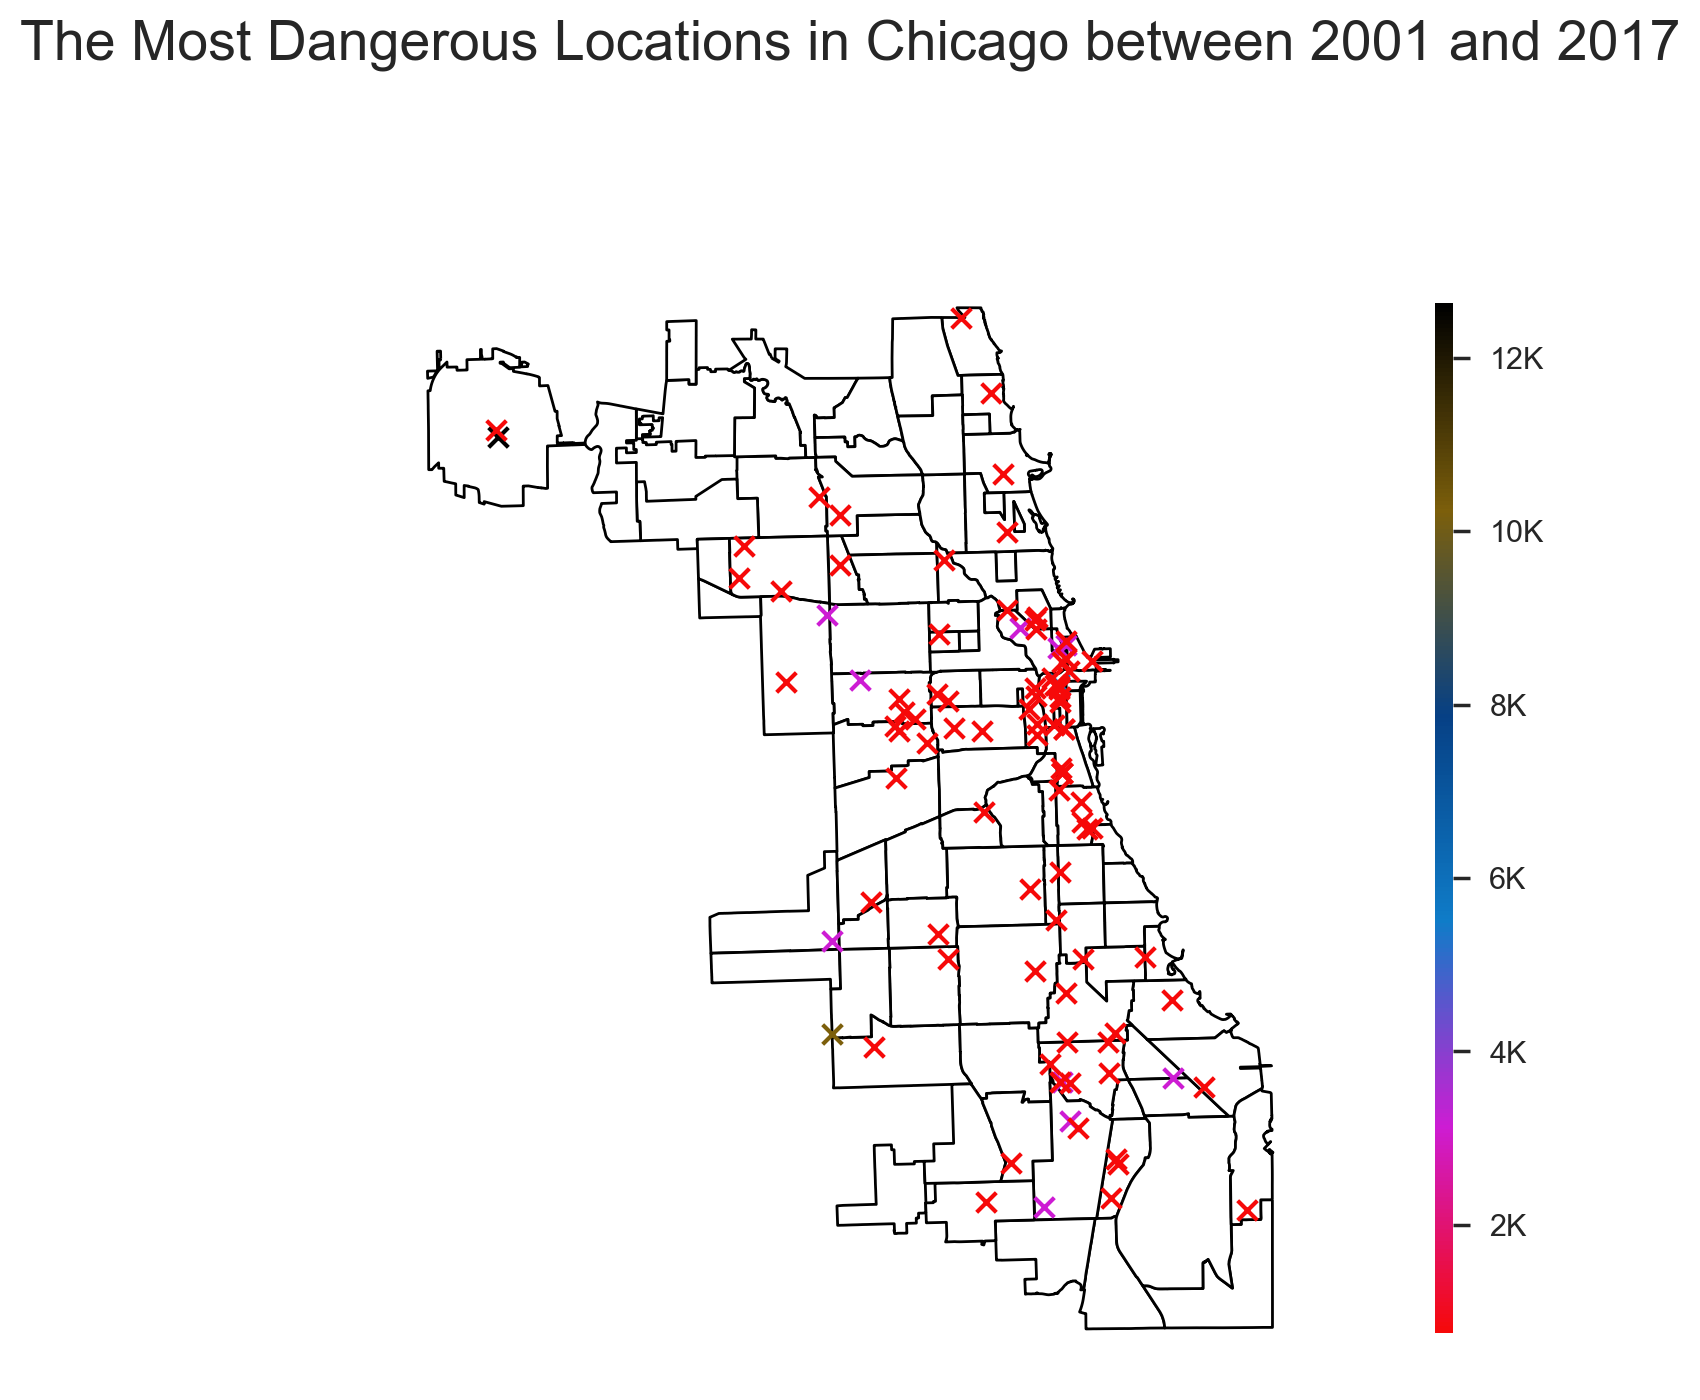

In [16]:
num_of_degrees = len(gdf.severity.unique()) # Number of severity degrees

color_pal = ['#F60909', '#CD1CD3', '#0F7CC8', '#064085', '#7C5F0B', '#000000'] # Custom colors
mycmap = LinearSegmentedColormap.from_list('mycmap', color_pal) # Create custom Colormap

color_pal.reverse() # Reverse Colormap

ax = chicago.plot(color='white', edgecolor='black', figsize=[6, 10]) # Plot Chicago Shape data

# Assign color for each degree of severity
for n, c in zip(range(1,num_of_degrees+2), color_pal):
    if n in gdf['severity'].unique():
        gdf_current = gdf.query(f'severity == {n}')
        gdf_current.plot(ax=ax, color=c, marker='x', markersize=50)

plt.xticks(ticks=[]), plt.yticks(ticks=[]) # Remove x and y ticks
plt.title('The Most Dangerous Locations in Chicago between 2001 and 2017', y = title_y, fontsize=20) # Set title

sb.despine(ax=ax, left=True, bottom=True) # Remove plot borders

# Create custome colorbar
vmin, vmax = -0.5, 4.25
fig = ax.get_figure()
cax = fig.add_axes([1.0, 0.245, 0.015, 0.515])
sm = plt.cm.ScalarMappable(cmap=mycmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
# fake up the array of the scalar mappable. Urgh...
sm._A = [0, 1, 2, 3, 4]
cbar = fig.colorbar(sm, cax=cax)

# Add customized ticks and labels for the colorbar
cbar.set_ticks(np.arange(0, 5, 0.8))
cbar.set_ticklabels(['2K', '4K', '6K', '8K', '10K', '12K'])

cbar.outline.set_visible(False) # Remove colorbar border color

plt.savefig(f'src/top_danger_map.png', transparent=True, bbox_inches='tight', pad_inches=1); # Save as png file

<img src="src/ty.png" width="800" height="800">